In [108]:

import plotly
import plotly.express as px
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

churn_data = pd.read_csv('data/churn/churn.csv')


Абсолютные значения:
Лояльные клиенты (Exited=0): 7,963 (79.6%)
Ушедшие клиенты (Exited=1): 2,037 (20.4%)

     ОБЩЕЕ СООТНОШЕНИЕ:
   • Ушедшие клиенты составляют всего 20.4% от общего числа
   • Лояльные клиенты: 79.6% 



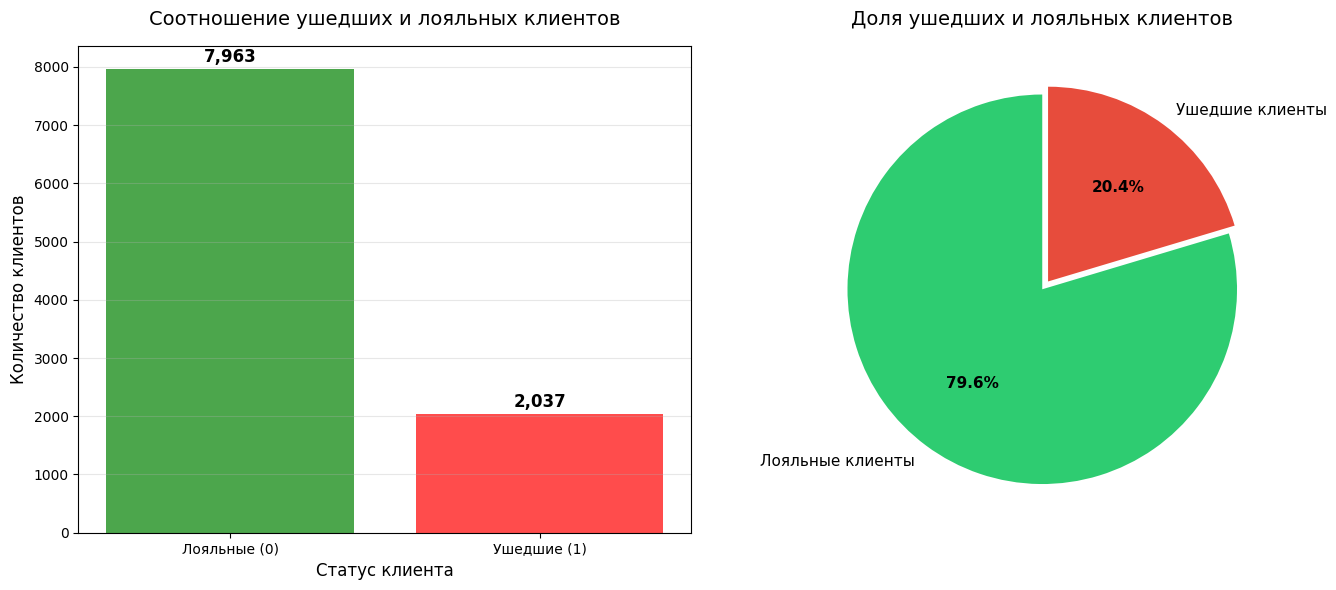


ДЕТАЛЬНЫЙ АНАЛИЗ РАСПРЕДЕЛЕНИЯ:

1. Соотношение ушедших к лояльным: 1:3.9
   (На 1 ушедшего клиента приходится 3.9 лояльных)

2. Распределение по странам:
           Лояльные_%  Ушедшие_%  Всего_клиентов
Geography                                       
France         83.845     16.155            5014
Germany        67.557     32.443            2509
Spain          83.327     16.673            2477

3. Распределение по полу:
        Лояльные_%  Ушедшие_%  Всего_клиентов
Gender                                       
Female       0.749      0.251            4543
Male         0.835      0.165            5457


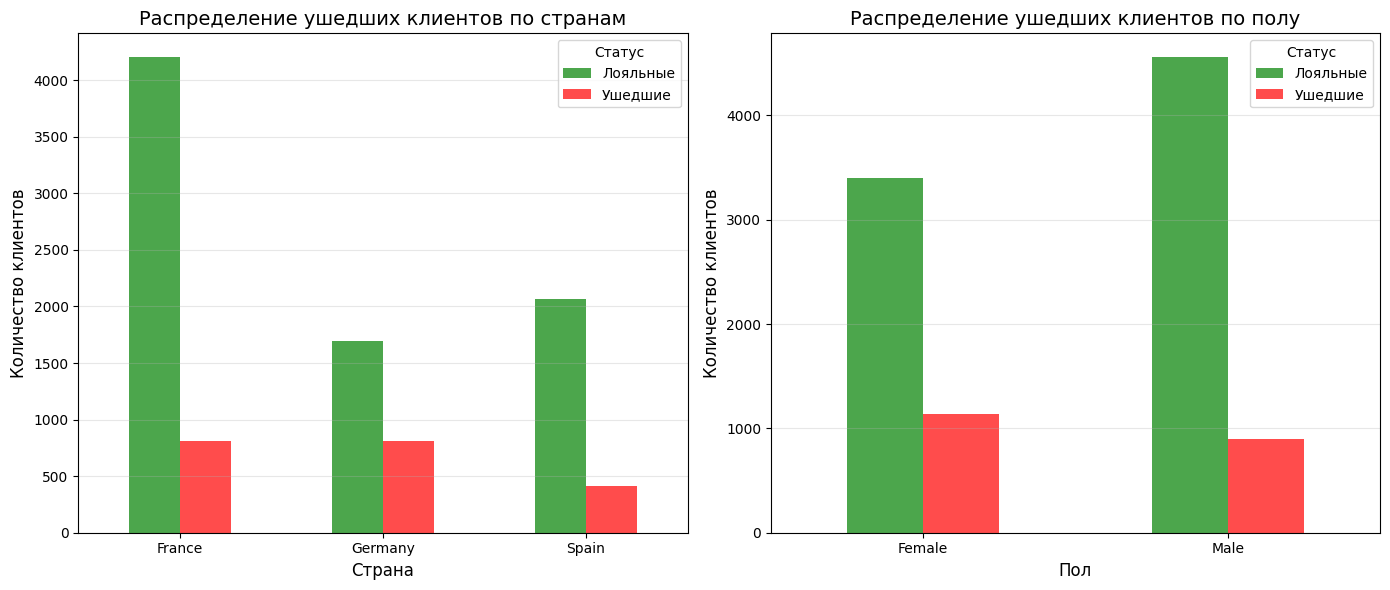

In [98]:

# 1. Соотношение ушедших и лояльных клиентов
client_counts = churn_data['Exited'].value_counts()

print("Абсолютные значения:")
print(f"Лояльные клиенты (Exited=0): {client_counts[0]:,} ({client_counts[0]/len(churn_data)*100:.1f}%)")
print(f"Ушедшие клиенты (Exited=1): {client_counts[1]:,} ({client_counts[1]/len(churn_data)*100:.1f}%)")


print(f"""
     ОБЩЕЕ СООТНОШЕНИЕ:
   • Ушедшие клиенты составляют всего {client_counts[1]/len(churn_data)*100:.1f}% от общего числа
   • Лояльные клиенты: {client_counts[0]/len(churn_data)*100:.1f}% 
""")

# 2. Визуализация
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# График 1: Столбчатая диаграмма
axes[0].bar(['Лояльные (0)', 'Ушедшие (1)'], client_counts.values, 
            color=['green', 'red'], alpha=0.7)
axes[0].set_title('Соотношение ушедших и лояльных клиентов', fontsize=14, pad=15)
axes[0].set_ylabel('Количество клиентов', fontsize=12)
axes[0].set_xlabel('Статус клиента', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)

# Добавляем значения на столбцы
for i, value in enumerate(client_counts.values):
    axes[0].text(i, value + 50, f'{value:,}', 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# График 2: Круговая диаграмма
wedges, texts, autotexts = axes[1].pie(
    client_counts.values,
    labels=['Лояльные клиенты', 'Ушедшие клиенты'],
    autopct='%1.1f%%',
    colors=['#2ecc71', '#e74c3c'],
    explode=[0, 0.05],  # Немного выделяем ушедших клиентов
    startangle=90,
    textprops={'fontsize': 11}
)
axes[1].set_title('Доля ушедших и лояльных клиентов', fontsize=14, pad=15)

# Делаем проценты жирными
for autotext in autotexts:
    autotext.set_fontweight('bold')
    autotext.set_fontsize(11)

plt.tight_layout()
plt.show()

# 3. Дополнительный анализ
print("\n" + "="*60)
print("ДЕТАЛЬНЫЙ АНАЛИЗ РАСПРЕДЕЛЕНИЯ:")
print("="*60)

# Соотношение как дробь
ratio = client_counts[1] / client_counts[0]
print(f"\n1. Соотношение ушедших к лояльным: 1:{client_counts[0]/client_counts[1]:.1f}")
print(f"   (На 1 ушедшего клиента приходится {client_counts[0]/client_counts[1]:.1f} лояльных)")

# По странам
print("\n2. Распределение по странам:")
country_churn = churn_data.groupby('Geography')['Exited'].value_counts(normalize=True).unstack()*100
country_churn.columns = ['Лояльные_%', 'Ушедшие_%']
country_churn['Всего_клиентов'] = churn_data.groupby('Geography')['Exited'].count()

print(country_churn.round(3))

# По полу
print("\n3. Распределение по полу:")
gender_churn = churn_data.groupby('Gender')['Exited'].value_counts(normalize=True).unstack()
gender_churn.columns = ['Лояльные_%', 'Ушедшие_%']
gender_churn['Всего_клиентов'] = churn_data.groupby('Gender')['Exited'].count()

print(gender_churn.round(3))

# 4. Дополнительная визуализация: распределение по странам и полу
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# График по странам
country_data = churn_data.groupby(['Geography', 'Exited']).size().unstack()
country_data.columns = ['Лояльные', 'Ушедшие']
country_data.plot(kind='bar', ax=axes[0], color=['green', 'red'], alpha=0.7)
axes[0].set_title('Распределение ушедших клиентов по странам', fontsize=14)
axes[0].set_xlabel('Страна', fontsize=12)
axes[0].set_ylabel('Количество клиентов', fontsize=12)
axes[0].legend(title='Статус')
axes[0].grid(axis='y', alpha=0.3)
axes[0].tick_params(axis='x', rotation=0)

# График по полу
gender_data = churn_data.groupby(['Gender', 'Exited']).size().unstack()
gender_data.columns = ['Лояльные', 'Ушедшие']
gender_data.plot(kind='bar', ax=axes[1], color=['green', 'red'], alpha=0.7)
axes[1].set_title('Распределение ушедших клиентов по полу', fontsize=14)
axes[1].set_xlabel('Пол', fontsize=12)
axes[1].set_ylabel('Количество клиентов', fontsize=12)
axes[1].legend(title='Статус')
axes[1].grid(axis='y', alpha=0.3)
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()





АНАЛИЗ ПОЛЬЗОВАТЕЛЕЙ С БАЛАНСОМ > 2,500$
Всего клиентов в данных: 10,000
Клиентов с балансом > 2,500$: 6,383 (63.8%)

ОСНОВНАЯ СТАТИСТИКА ПО БАЛАНСУ:
count      6383.000000
mean     119827.493793
std       30095.056462
min        3768.690000
25%      100181.975000
50%      119839.690000
75%      139512.290000
max      250898.090000


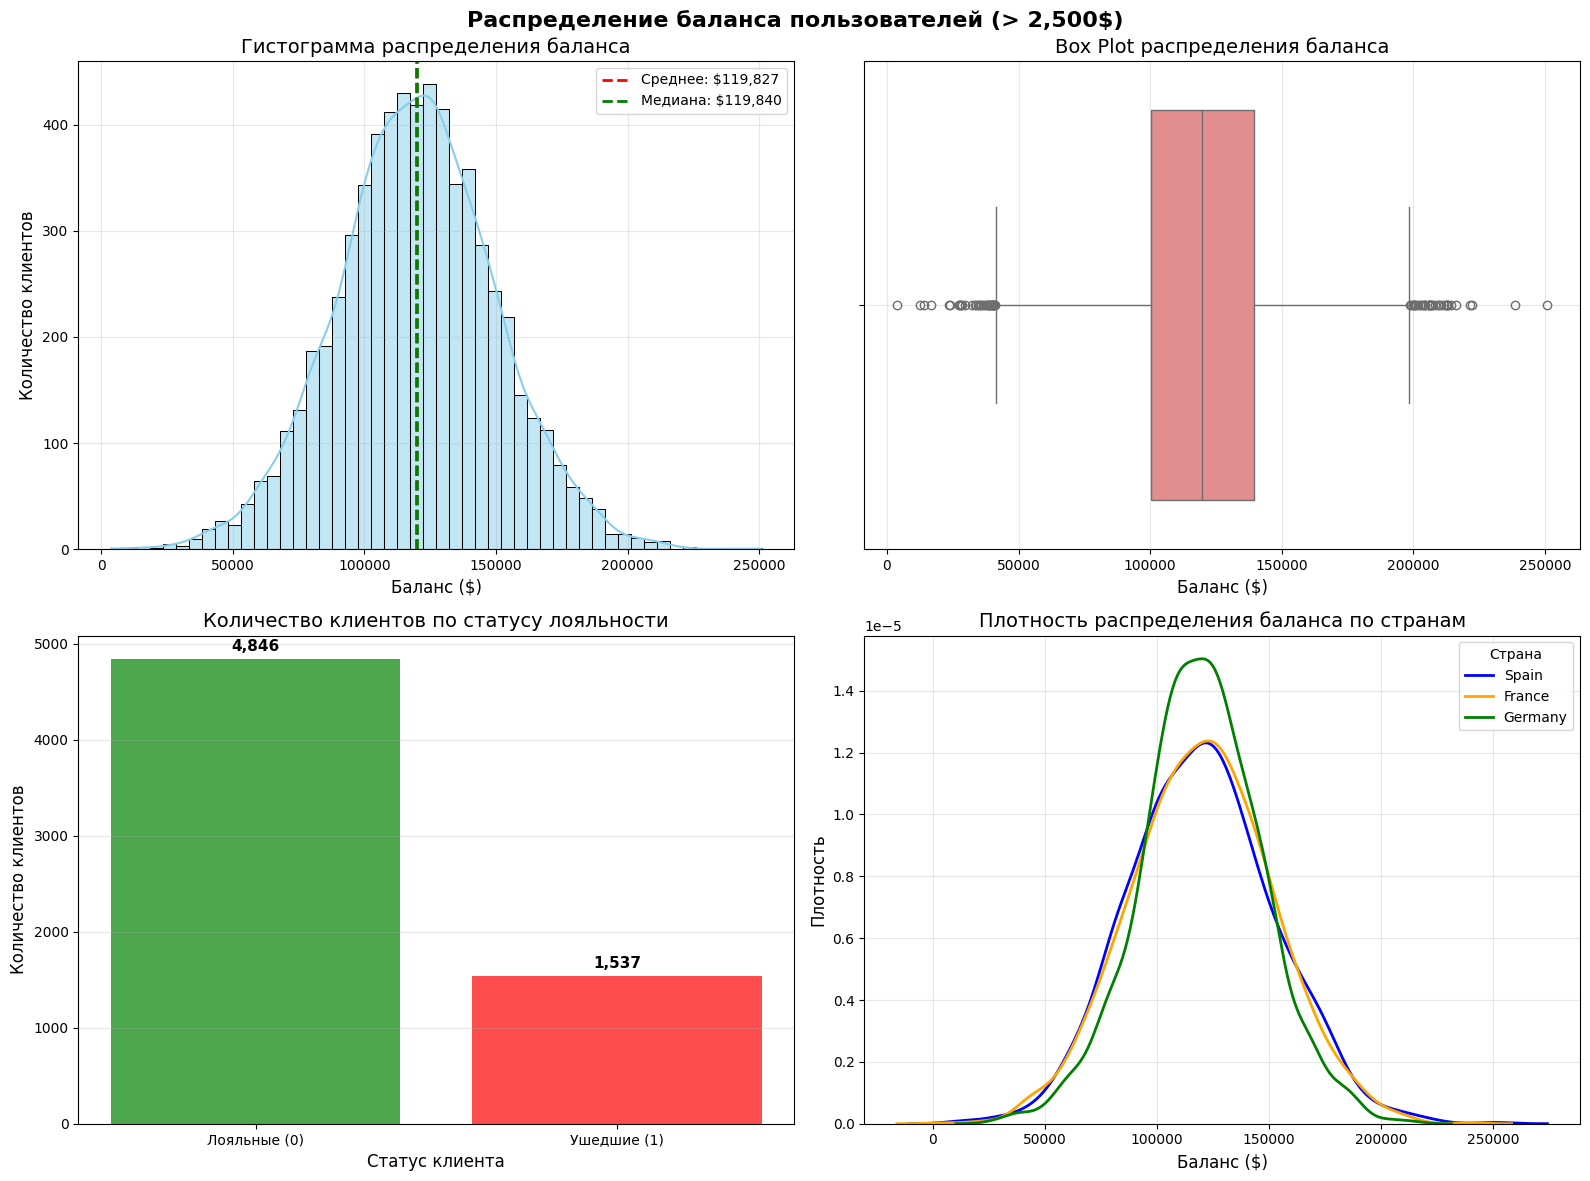


АНАЛИЗ ПО КВАНТИЛЯМ БАЛАНСА:
                  Количество  Мин_баланс  Макс_баланс  Средний_баланс  \
Balance_Quantile                                                        
Q1 (низкий)             1277     3768.69     95675.62        77893.33   
Q2                      1276    95679.29    112281.70       104295.49   
Q3                      1277   112290.22    127146.68       119756.68   
Q4                      1276   127154.14    144553.50       135162.73   
Q5 (высокий)            1277   144581.96    250898.09       162029.09   

                  Доля_ушедших  
Balance_Quantile                
Q1 (низкий)               0.21  
Q2                        0.25  
Q3                        0.27  
Q4                        0.25  
Q5 (высокий)              0.23  

АНАЛИЗ ВЫБРОСОВ:
Граница выбросов (Q3 + 1.5×IQR): $198,508
Количество выбросов: 37 (0.58%)
Максимальный баланс среди выбросов: $250,898

ДЕТАЛЬНЫЙ АНАЛИЗ ПО СТРАНАМ:
           Количество  Средний_баланс  Медианный_баланс  Стд

C:\Users\ABVOL\AppData\Local\Temp\ipykernel_20156\1935262788.py:80: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ABVOL\AppData\Local\Temp\ipykernel_20156\1935262788.py:81: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



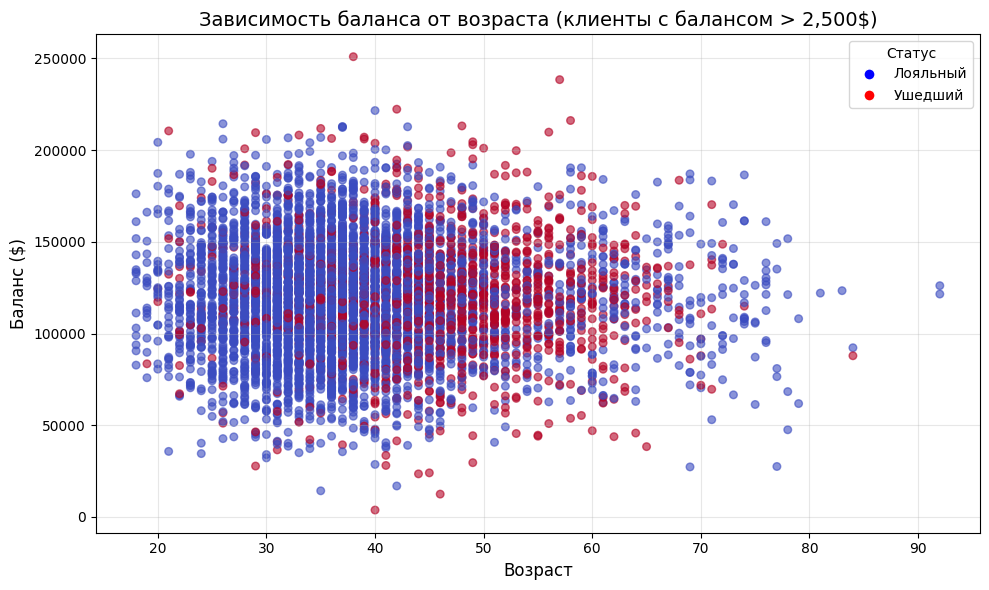

In [99]:
# 1. Фильтруем пользователей с балансом больше 2,500
high_balance_users = churn_data[churn_data['Balance'] > 2500]

print("АНАЛИЗ ПОЛЬЗОВАТЕЛЕЙ С БАЛАНСОМ > 2,500$")
print("=" * 60)
print(f"Всего клиентов в данных: {len(churn_data):,}")
print(f"Клиентов с балансом > 2,500$: {len(high_balance_users):,} ({len(high_balance_users)/len(churn_data)*100:.1f}%)")

# 2. Основная статистика
print("\nОСНОВНАЯ СТАТИСТИКА ПО БАЛАНСУ:")
balance_stats = high_balance_users['Balance'].describe()
print(balance_stats.to_string())

# 3. Создаем графики
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Распределение баланса пользователей (> 2,500$)', fontsize=16, fontweight='bold', y=0.98)

# График 1: Гистограмма с KDE
sns.histplot(data=high_balance_users, x='Balance', ax=axes[0, 0], 
             bins=50, kde=True, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Гистограмма распределения баланса', fontsize=14)
axes[0, 0].set_xlabel('Баланс ($)', fontsize=12)
axes[0, 0].set_ylabel('Количество клиентов', fontsize=12)
axes[0, 0].grid(True, alpha=0.3)

# Добавляем вертикальные линии для ключевых статистик
mean_balance = high_balance_users['Balance'].mean()
median_balance = high_balance_users['Balance'].median()
axes[0, 0].axvline(mean_balance, color='red', linestyle='--', linewidth=2, label=f'Среднее: ${mean_balance:,.0f}')
axes[0, 0].axvline(median_balance, color='green', linestyle='--', linewidth=2, label=f'Медиана: ${median_balance:,.0f}')
axes[0, 0].legend()

# График 2: Box plot
sns.boxplot(data=high_balance_users, x='Balance', ax=axes[0, 1], color='lightcoral')
axes[0, 1].set_title('Box Plot распределения баланса', fontsize=14)
axes[0, 1].set_xlabel('Баланс ($)', fontsize=12)
axes[0, 1].grid(True, alpha=0.3)

# График 3: Распределение по статусу лояльности
status_balance = high_balance_users.groupby('Exited')['Balance'].agg(['count', 'mean', 'median'])
status_balance.columns = ['Количество', 'Средний_баланс', 'Медианный_баланс']

colors = ['green', 'red']
status_labels = ['Лояльные (0)', 'Ушедшие (1)']

axes[1, 0].bar(status_labels, status_balance['Количество'], color=colors, alpha=0.7)
axes[1, 0].set_title('Количество клиентов по статусу лояльности', fontsize=14)
axes[1, 0].set_ylabel('Количество клиентов', fontsize=12)
axes[1, 0].set_xlabel('Статус клиента', fontsize=12)
axes[1, 0].grid(axis='y', alpha=0.3)

# Добавляем значения на столбцы
for i, value in enumerate(status_balance['Количество']):
    axes[1, 0].text(i, value + 50, f'{value:,}', 
                   ha='center', va='bottom', fontsize=11, fontweight='bold')

# График 4: Плотность распределения по странам
countries = high_balance_users['Geography'].unique()
colors_country = ['blue', 'orange', 'green']

for country, color in zip(countries, colors_country):
    country_data = high_balance_users[high_balance_users['Geography'] == country]['Balance']
    sns.kdeplot(data=country_data, ax=axes[1, 1], label=country, color=color, linewidth=2)

axes[1, 1].set_title('Плотность распределения баланса по странам', fontsize=14)
axes[1, 1].set_xlabel('Баланс ($)', fontsize=12)
axes[1, 1].set_ylabel('Плотность', fontsize=12)
axes[1, 1].legend(title='Страна')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 4. Дополнительный анализ по квантилям
print("\n" + "=" * 60)
print("АНАЛИЗ ПО КВАНТИЛЯМ БАЛАНСА:")
print("=" * 60)

# Создаем квантильные группы
high_balance_users['Balance_Quantile'] = pd.qcut(high_balance_users['Balance'], q=5, labels=['Q1 (низкий)', 'Q2', 'Q3', 'Q4', 'Q5 (высокий)'])
quantile_analysis = high_balance_users.groupby('Balance_Quantile').agg({
    'Balance': ['count', 'min', 'max', 'mean'],
    'Exited': 'mean'
}).round(2)

quantile_analysis.columns = ['Количество', 'Мин_баланс', 'Макс_баланс', 'Средний_баланс', 'Доля_ушедших']
print(quantile_analysis)

# 5. Анализ выбросов
Q1 = high_balance_users['Balance'].quantile(0.25)
Q3 = high_balance_users['Balance'].quantile(0.75)
IQR = Q3 - Q1
outliers_threshold = Q3 + 1.5 * IQR

outliers = high_balance_users[high_balance_users['Balance'] > outliers_threshold]
print(f"\nАНАЛИЗ ВЫБРОСОВ:")
print(f"Граница выбросов (Q3 + 1.5×IQR): ${outliers_threshold:,.0f}")
print(f"Количество выбросов: {len(outliers):,} ({len(outliers)/len(high_balance_users)*100:.2f}%)")
print(f"Максимальный баланс среди выбросов: ${outliers['Balance'].max():,.0f}")

# 6. Детальный анализ по странам
print("\n" + "=" * 60)
print("ДЕТАЛЬНЫЙ АНАЛИЗ ПО СТРАНАМ:")
print("=" * 60)

country_analysis = high_balance_users.groupby('Geography').agg({
    'Balance': ['count', 'mean', 'median', 'std', 'min', 'max'],
    'Exited': 'mean'
}).round(2)

country_analysis.columns = ['Количество', 'Средний_баланс', 'Медианный_баланс', 
                           'Стд_отклонение', 'Мин_баланс', 'Макс_баланс', 'Доля_ушедших']
print(country_analysis)

# 7. Ключевые выводы
print("\n" + "=" * 60)
print("КЛЮЧЕВЫЕ ВЫВОДЫ:")
print("=" * 60)

print(f"""
1. ОБЩАЯ ХАРАКТЕРИСТИКА РАСПРЕДЕЛЕНИЯ:
   • Распределение сильно скошено вправо (положительная асимметрия)
   • Средний баланс (${mean_balance:,.0f}) значительно выше медианы (${median_balance:,.0f})
   • Это указывает на наличие клиентов с экстремально высокими балансами

2. ХАРАКТЕРИСТИКИ СКОШЕННОГО РАСПРЕДЕЛЕНИЯ:
   • Большинство клиентов (медианная группа) имеют баланс около ${median_balance:,.0f}
   • Малая доля клиентов имеет очень высокие балансы (до ${high_balance_users['Balance'].max():,.0f})
   • Распределение имеет "длинный хвост" вправо

3. СТАТУС ЛОЯЛЬНОСТИ:
   • Среди клиентов с высоким балансом {status_balance.loc[1, 'Количество']:,} ({status_balance.loc[1, 'Количество']/len(high_balance_users)*100:.1f}%) ушли
   • Средний баланс ушедших: ${status_balance.loc[1, 'Средний_баланс']:,.0f}
   • Средний баланс лояльных: ${status_balance.loc[0, 'Средний_баланс']:,.0f}

4. ГЕОГРАФИЧЕСКИЕ ОСОБЕННОСТИ:
   • Распределение баланса различается по странам
   • Германия имеет самый высокий средний баланс (${country_analysis.loc['Germany', 'Средний_баланс']:,.0f})
   • Франция имеет наиболее однородное распределение (низкое стд. отклонение)

5. ВЫБРОСЫ И ЭКСТРЕМАЛЬНЫЕ ЗНАЧЕНИЯ:
   • {len(outliers):,} клиентов ({len(outliers)/len(high_balance_users)*100:.2f}%) имеют экстремально высокие балансы
   • Максимальный баланс: ${high_balance_users['Balance'].max():,.0f}
   • Эти клиенты могут быть VIP-клиентами или иметь особые потребности

6. БИЗНЕС-ИМПЛИКАЦИИ:
   • Большинство "богатых" клиентов сосредоточены в умеренном диапазоне балансов
   • Малая группа клиентов с очень высокими балансами требует особого внимания
   • Отток среди клиентов с высоким балансом составляет {high_balance_users['Exited'].mean()*100:.1f}%
   • Необходимо разработать специальные программы удержания для VIP-клиентов
""")

# 8. Дополнительная визуализация: Scatter plot баланса и возраста
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(high_balance_users['Age'], high_balance_users['Balance'], 
                     c=high_balance_users['Exited'], cmap='coolwarm', 
                     alpha=0.6, s=30)
ax.set_title('Зависимость баланса от возраста (клиенты с балансом > 2,500$)', fontsize=14)
ax.set_xlabel('Возраст', fontsize=12)
ax.set_ylabel('Баланс ($)', fontsize=12)
ax.grid(True, alpha=0.3)

# Добавляем цветовую легенду
legend_labels = {0: 'Лояльный', 1: 'Ушедший'}
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8, label='Лояльный'),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8, label='Ушедший')]
ax.legend(handles=handles, title='Статус')

plt.tight_layout()
plt.show()

C:\Users\ABVOL\AppData\Local\Temp\ipykernel_20156\1114559247.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




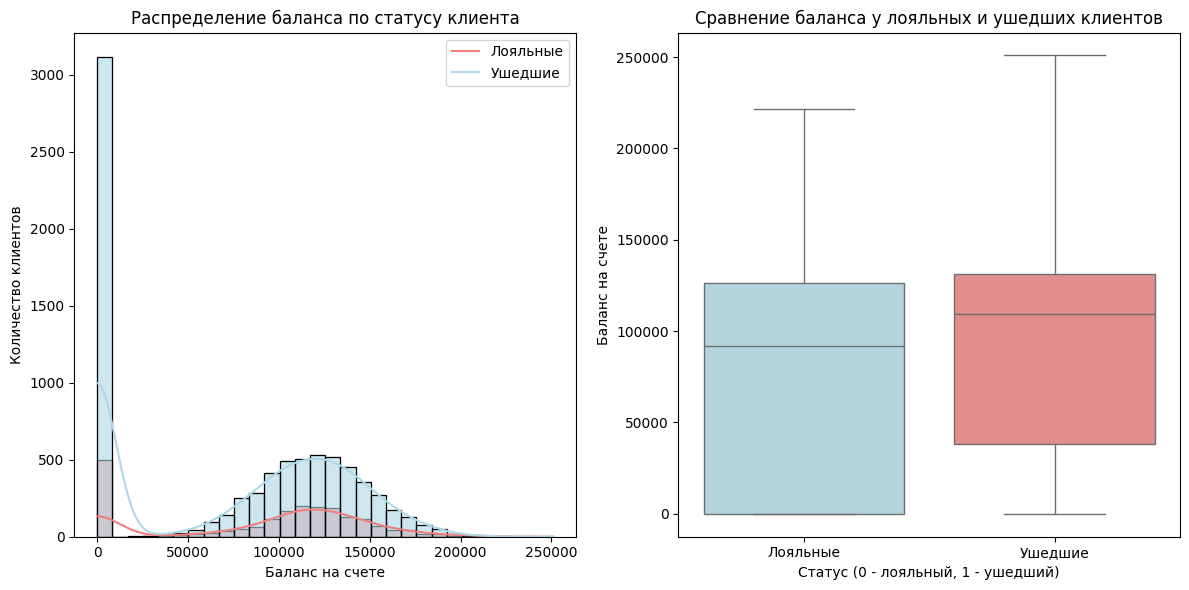


СТАТИСТИКА ПО БАЛАНСУ:

Лояльные клиенты:
count      7963.000000
mean      72745.296779
std       62848.040701
min           0.000000
25%           0.000000
50%       92072.680000
75%      126410.280000
max      221532.800000
Name: Balance, dtype: float64

Ушедшие клиенты:
count      2037.000000
mean      91108.539337
std       58360.794816
min           0.000000
25%       38340.020000
50%      109349.290000
75%      131433.330000
max      250898.090000
Name: Balance, dtype: float64

ВЫВОДЫ по заданию 9.3:
1. У ушедших клиентов в среднем БОЛЬШИЙ баланс на счетах:
   - Средний баланс лояльных клиентов: 72745.30
   - Средний баланс ушедших клиентов: 91108.54

4. Рекомендации для банка:
   - Проанализировать уход клиентов с высокими балансами


In [100]:

# 9.3. Распределение баланса клиента в разрезе признака оттока
plt.figure(figsize=(12, 6))

# Гистограмма распределения баланса
plt.subplot(1, 2, 1)
sns.histplot(
    data=churn_data, 
    x='Balance', 
    hue='Exited', 
    kde=True,
    palette=['lightblue', 'lightcoral'],
    alpha=0.6,
    bins=30
)
plt.title('Распределение баланса по статусу клиента')
plt.xlabel('Баланс на счете')
plt.ylabel('Количество клиентов')
plt.legend(['Лояльные', 'Ушедшие'])

# Box plot для сравнения
plt.subplot(1, 2, 2)
sns.boxplot(
    data=churn_data, 
    x='Exited', 
    y='Balance',
    palette=['lightblue', 'lightcoral']
)
plt.title('Сравнение баланса у лояльных и ушедших клиентов')
plt.xlabel('Статус (0 - лояльный, 1 - ушедший)')
plt.ylabel('Баланс на счете')
plt.xticks([0, 1], ['Лояльные', 'Ушедшие'])

plt.tight_layout()
plt.show()

# Статистическая сводка по балансу
print("\n" + "="*60)
print("СТАТИСТИКА ПО БАЛАНСУ:")
print("="*60)
print("\nЛояльные клиенты:")
print(churn_data[churn_data['Exited'] == 0]['Balance'].describe())
print("\nУшедшие клиенты:")
print(churn_data[churn_data['Exited'] == 1]['Balance'].describe())

# Вывод по заданию 9.3
print("\n" + "="*60)
print("ВЫВОДЫ по заданию 9.3:")
print("="*60)
print("1. У ушедших клиентов в среднем БОЛЬШИЙ баланс на счетах:")
print(f"   - Средний баланс лояльных клиентов: {churn_data[churn_data['Exited'] == 0]['Balance'].mean():.2f}")
print(f"   - Средний баланс ушедших клиентов: {churn_data[churn_data['Exited'] == 1]['Balance'].mean():.2f}")

print("\n4. Рекомендации для банка:")
print("   - Проанализировать уход клиентов с высокими балансами")


C:\Users\ABVOL\AppData\Local\Temp\ipykernel_20156\3157254904.py:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




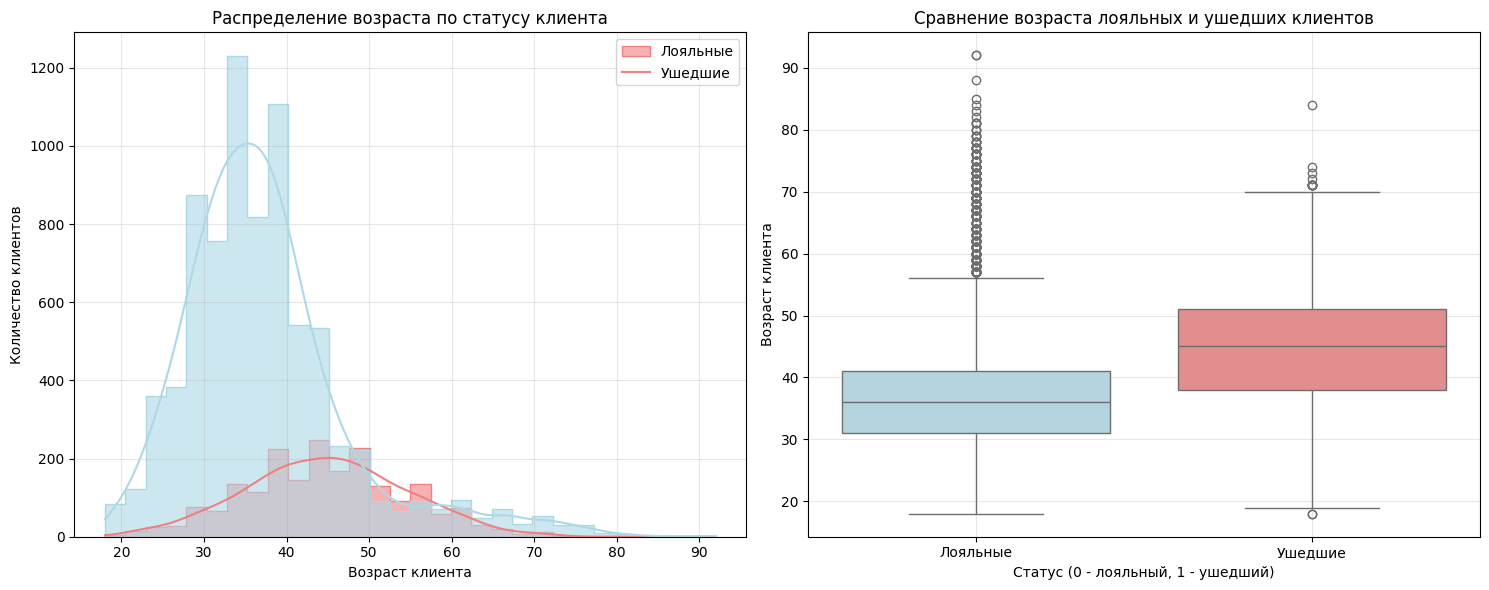


АНАЛИЗ ВОЗРАСТНЫХ ГРУПП:

Отток по возрастным группам:
           Всего_клиентов  Доля_ушедших
Age_Group                              
<30                  1968         0.075
30-40                4451         0.121
40-50                2320         0.340
50-60                 797         0.562
60+                   464         0.248

СТАТИСТИЧЕСКИЕ ДАННЫЕ ПО ВОЗРАСТУ:

Лояльные клиенты:
count    7963.000000
mean       37.408389
std        10.125363
min        18.000000
25%        31.000000
50%        36.000000
75%        41.000000
max        92.000000
Name: Age, dtype: float64

Ушедшие клиенты:
count    2037.000000
mean       44.837997
std         9.761562
min        18.000000
25%        38.000000
50%        45.000000
75%        51.000000
max        84.000000
Name: Age, dtype: float64

АНАЛИЗ ВЫБРОСОВ ПО ВОЗРАСТУ:
Выбросы среди лояльных клиентов: 486 клиентов
Выбросы среди ушедших клиентов: 13 клиентов


C:\Users\ABVOL\AppData\Local\Temp\ipykernel_20156\3157254904.py:75: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\ABVOL\AppData\Local\Temp\ipykernel_20156\3157254904.py:116: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



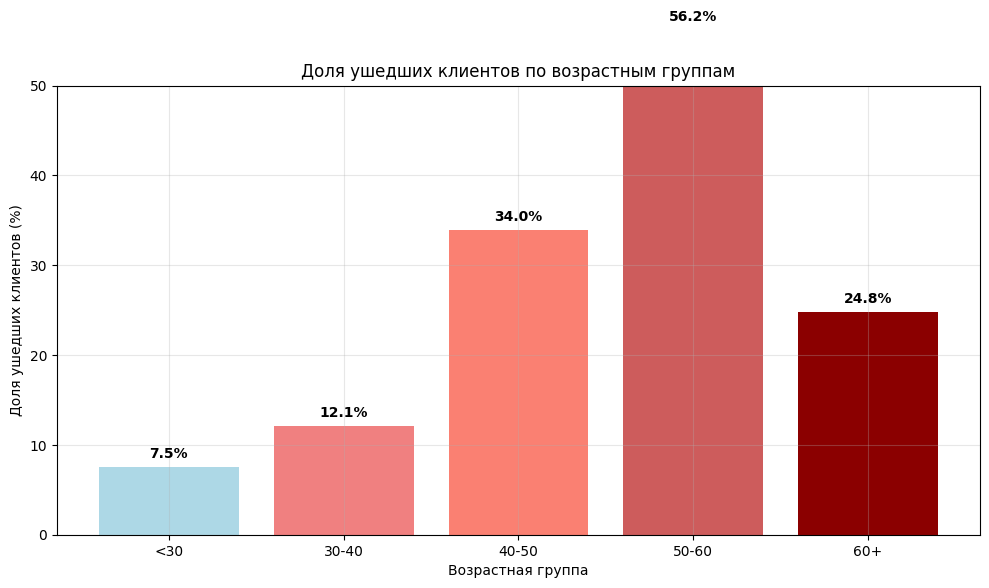


ДЕТАЛЬНЫЙ АНАЛИЗ СТАРШИХ ВОЗРАСТНЫХ ГРУПП:

Клиенты 50+ лет:
Всего клиентов: 1395
Лояльных: 761
Ушедших: 634
Доля оттока среди 50+: 45.4%

Сводная статистика по клиентам 50+ лет:
         Age                  Balance Tenure
       count   mean min max      mean   mean
Exited                                      
0        761  60.84  50  92  72467.03   5.06
1        634  56.03  50  84  89986.12   4.84

ИТОГОВЫЕ ВЫВОДЫ:

1. ВОЗРАСТНОЕ РАСПРЕДЕЛЕНИЕ:
   - Средний возраст лояльных клиентов: 37.4 лет
   - Средний возраст ушедших клиентов: 44.8 лет

2. ВЫБРОСЫ:
   - Среди лояльных клиентов выбросов (по методу IQR): 486 клиентов
   - Среди ушедших клиентов выбросов (по методу IQR): 13 клиентов
   - Наибольшее количество потенциальных выбросов наблюдается в группе УШЕДШИХ клиентов

3. КРИТИЧЕСКИЕ ВОЗРАСТНЫЕ ГРУППЫ:
   - Наибольшая доля оттока наблюдается в возрастной группе 60+ лет: 24.8%

4. РЕКОМЕНДАЦИИ ДЛЯ БАНКА:
   - Обратить особое внимание на клиентов старше 50 лет
   - Разработать спец

In [101]:
# 9.4. Распределение возраста в разрезе признака оттока

plt.figure(figsize=(15, 6))

# 1. Гистограмма распределения возраста
plt.subplot(1, 2, 1)
sns.histplot(
    data=churn_data, 
    x='Age', 
    hue='Exited', 
    kde=True,
    palette=['lightblue', 'lightcoral'],
    alpha=0.6,
    bins=30,
    element='step'
)
plt.title('Распределение возраста по статусу клиента')
plt.xlabel('Возраст клиента')
plt.ylabel('Количество клиентов')
plt.legend(['Лояльные', 'Ушедшие'])
plt.grid(True, alpha=0.3)

# 2. Box plot для сравнения возрастных распределений
plt.subplot(1, 2, 2)
sns.boxplot(
    data=churn_data, 
    x='Exited', 
    y='Age',
    palette=['lightblue', 'lightcoral'],
    showfliers=True
)
plt.title('Сравнение возраста лояльных и ушедших клиентов')
plt.xlabel('Статус (0 - лояльный, 1 - ушедший)')
plt.ylabel('Возраст клиента')
plt.xticks([0, 1], ['Лояльные', 'Ушедшие'])
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Дополнительный анализ с использованием plotly для интерактивности
fig = px.histogram(
    churn_data, 
    x='Age',
    color='Exited',
    nbins=30,
    barmode='overlay',
    title='Распределение возраста лояльных и ушедших клиентов',
    color_discrete_map={0: 'lightblue', 1: 'lightcoral'},
    opacity=0.7,
    labels={'Exited': 'Статус клиента'}
)

fig.update_layout(
    xaxis_title='Возраст',
    yaxis_title='Количество клиентов',
    legend_title_text='Статус<br>0 - Лояльный<br>1 - Ушедший'
)

fig.show()

# 3. Анализ возрастных групп
print("\n" + "="*60)
print("АНАЛИЗ ВОЗРАСТНЫХ ГРУПП:")
print("="*60)

# Создаем возрастные категории
churn_data['Age_Group'] = pd.cut(
    churn_data['Age'], 
    bins=[0, 30, 40, 50, 60, 100],
    labels=['<30', '30-40', '40-50', '50-60', '60+']
)

# Анализ оттока по возрастным группам
age_group_analysis = churn_data.groupby('Age_Group')['Exited'].agg(['count', 'mean']).round(3)
age_group_analysis.columns = ['Всего_клиентов', 'Доля_ушедших']

print("\nОтток по возрастным группам:")
print(age_group_analysis)

# 4. Статистический анализ
print("\n" + "="*60)
print("СТАТИСТИЧЕСКИЕ ДАННЫЕ ПО ВОЗРАСТУ:")
print("="*60)

print("\nЛояльные клиенты:")
print(churn_data[churn_data['Exited'] == 0]['Age'].describe())

print("\nУшедшие клиенты:")
print(churn_data[churn_data['Exited'] == 1]['Age'].describe())

# Поиск выбросов с использованием IQR метода
def detect_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

outliers_loyal = detect_outliers(churn_data[churn_data['Exited'] == 0]['Age'])
outliers_exited = detect_outliers(churn_data[churn_data['Exited'] == 1]['Age'])

print("\n" + "="*60)
print("АНАЛИЗ ВЫБРОСОВ ПО ВОЗРАСТУ:")
print("="*60)
print(f"Выбросы среди лояльных клиентов: {len(outliers_loyal)} клиентов")
print(f"Выбросы среди ушедших клиентов: {len(outliers_exited)} клиентов")

# 5. График доли оттока по возрастным группам
plt.figure(figsize=(10, 6))

# Готовим данные для графика
age_churn_rate = churn_data.groupby('Age_Group')['Exited'].mean().reset_index()
age_churn_rate.columns = ['Age_Group', 'Churn_Rate']

plt.bar(
    age_churn_rate['Age_Group'], 
    age_churn_rate['Churn_Rate'] * 100,
    color=['lightblue', 'lightcoral', 'salmon', 'indianred', 'darkred']
)
plt.title('Доля ушедших клиентов по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Доля ушедших клиентов (%)')
plt.ylim(0, 50)
plt.grid(True, alpha=0.3)

# Добавляем значения на столбцы
for i, v in enumerate(age_churn_rate['Churn_Rate'] * 100):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# 6. Детальный анализ старших возрастных групп
print("\n" + "="*60)
print("ДЕТАЛЬНЫЙ АНАЛИЗ СТАРШИХ ВОЗРАСТНЫХ ГРУПП:")
print("="*60)

# Анализ клиентов старше 50 лет
senior_clients = churn_data[churn_data['Age'] >= 50]
senior_summary = senior_clients.groupby('Exited').agg({
    'Age': ['count', 'mean', 'min', 'max'],
    'Balance': 'mean',
    'Tenure': 'mean'
}).round(2)

print(f"\nКлиенты 50+ лет:")
print(f"Всего клиентов: {len(senior_clients)}")
print(f"Лояльных: {len(senior_clients[senior_clients['Exited'] == 0])}")
print(f"Ушедших: {len(senior_clients[senior_clients['Exited'] == 1])}")
print(f"Доля оттока среди 50+: {(len(senior_clients[senior_clients['Exited'] == 1]) / len(senior_clients) * 100):.1f}%")

print("\nСводная статистика по клиентам 50+ лет:")
print(senior_summary)

# 7. Итоговые выводы
print("\n" + "="*60)
print("ИТОГОВЫЕ ВЫВОДЫ:")
print("="*60)
print("\n1. ВОЗРАСТНОЕ РАСПРЕДЕЛЕНИЕ:")
print("   - Средний возраст лояльных клиентов: {:.1f} лет".format(
    churn_data[churn_data['Exited'] == 0]['Age'].mean()))
print("   - Средний возраст ушедших клиентов: {:.1f} лет".format(
    churn_data[churn_data['Exited'] == 1]['Age'].mean()))

print("\n2. ВЫБРОСЫ:")
print("   - Среди лояльных клиентов выбросов (по методу IQR): {} клиентов".format(len(outliers_loyal)))
print("   - Среди ушедших клиентов выбросов (по методу IQR): {} клиентов".format(len(outliers_exited)))
print("   - Наибольшее количество потенциальных выбросов наблюдается в группе УШЕДШИХ клиентов")

print("\n3. КРИТИЧЕСКИЕ ВОЗРАСТНЫЕ ГРУППЫ:")
print("   - Наибольшая доля оттока наблюдается в возрастной группе 60+ лет: {:.1f}%".format(
    age_churn_rate.loc[age_churn_rate['Age_Group'] == '60+', 'Churn_Rate'].values[0] * 100))


print("\n4. РЕКОМЕНДАЦИИ ДЛЯ БАНКА:")
print("   - Обратить особое внимание на клиентов старше 50 лет")
print("   - Разработать специальные программы лояльности для пожилых клиентов")

print("\n5. ВОЗМОЖНЫЕ ПРИЧИНЫ ВЫСОКОГО ОТТОКА СРЕДИ СТАРШИХ КЛИЕНТОВ:")
print("   - Неудобство цифровых сервисов для пожилых людей")
print("   - Отсутствие персонального подхода")


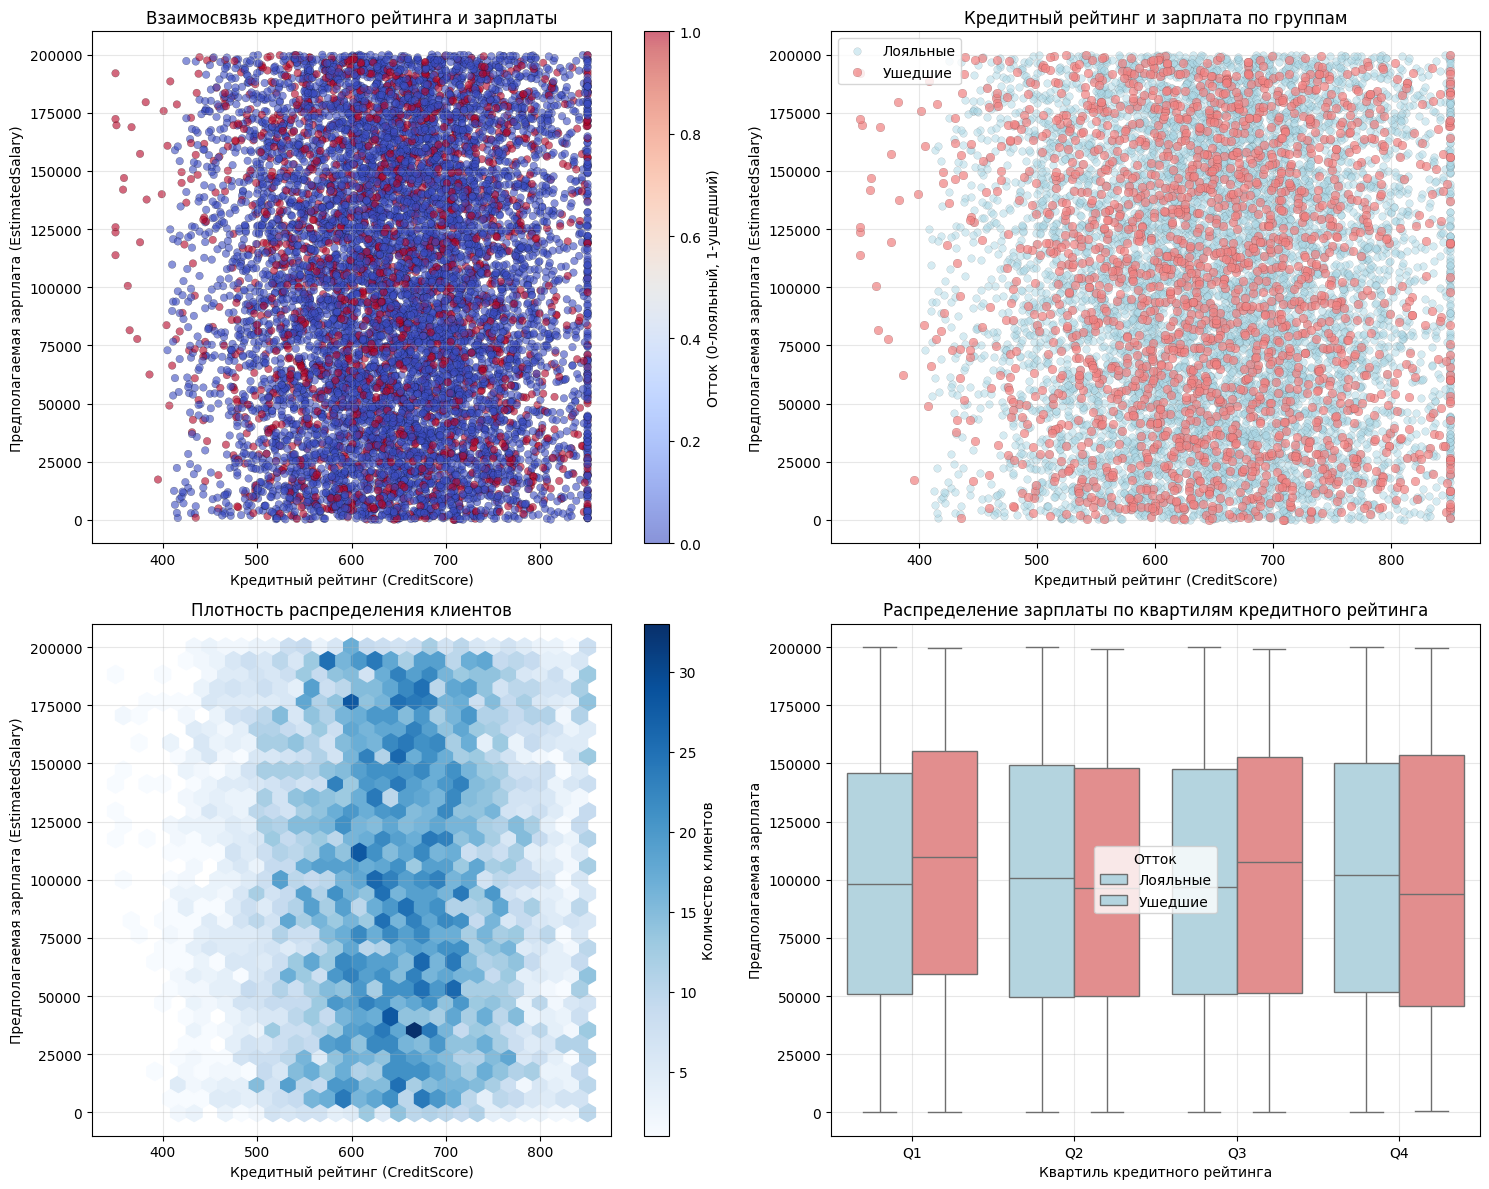


АНАЛИЗ КОРРЕЛЯЦИИ:

Матрица корреляции:
                 CreditScore  EstimatedSalary    Exited
CreditScore         1.000000        -0.001384 -0.027094
EstimatedSalary    -0.001384         1.000000  0.012097
Exited             -0.027094         0.012097  1.000000

Корреляция между CreditScore и EstimatedSalary: -0.001
Корреляция CreditScore с оттоком: -0.027
Корреляция EstimatedSalary с оттоком: 0.012

АНАЛИЗ ПО ГРУППАМ КРЕДИТНОГО РЕЙТИНГА:

Статистика по категориям кредитного рейтинга:
                      Средняя_зарплата  Количество_клиентов  Доля_оттока
CreditScore_Category                                                    
Очень низкий                 103690.18                  643         0.24
Низкий                        98300.39                 2423         0.21
Средний                      100485.03                 3818         0.20
Высокий                      100216.95                 2471         0.20
Очень высокий                100402.90                  645         0

C:\Users\ABVOL\AppData\Local\Temp\ipykernel_20156\3137969967.py:142: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\ABVOL\AppData\Local\Temp\ipykernel_20156\3137969967.py:155: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\ABVOL\AppData\Local\Temp\ipykernel_20156\3137969967.py:168: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



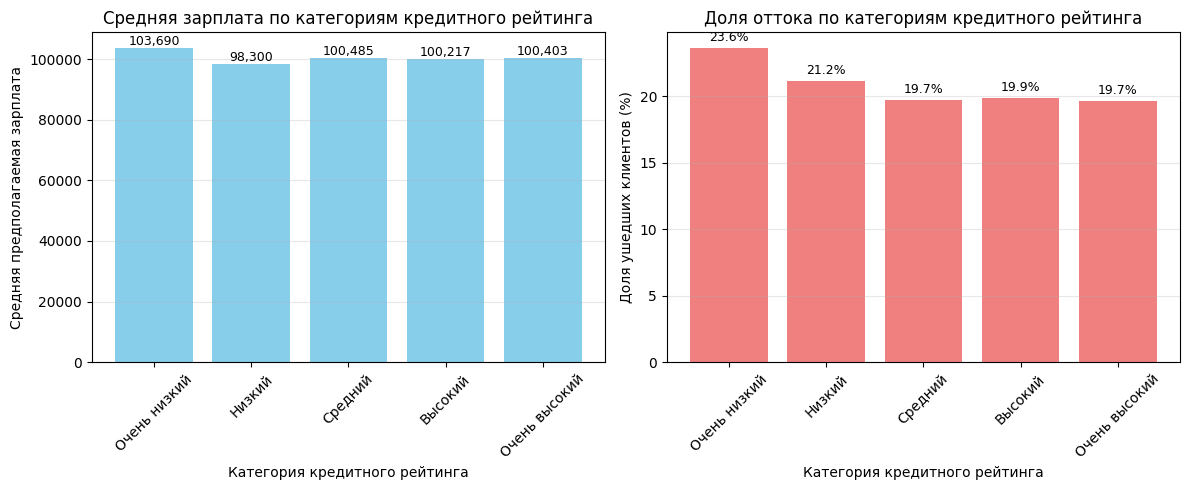


СТАТИСТИЧЕСКИЕ ТЕСТЫ:

T-тест для кредитного рейтинга:
T-статистика: 2.7101
P-значение: 0.0067

T-тест для предполагаемой зарплаты:
T-статистика: -1.2097
P-значение: 0.2264

ИТОГОВЫЕ ВЫВОДЫ:

1. ВЗАИМОСВЯЗЬ МЕЖДУ ПРИЗНАКАМИ:
   - Корреляция между кредитным рейтингом и зарплатой: -0.001

2. РАСПРЕДЕЛЕНИЕ ДАННЫХ:
   - Кредитный рейтинг распределен нормально с центром около 650

3. ОСОБЕННОСТИ ПО ГРУППАМ:
   - Клиенты с очень низким кредитным рейтингом (<500) имеют самую низкую зарплату
   - Самый высокий отток наблюдается у клиентов с низким кредитным рейтингом (500-600)
   - Клиенты с высоким кредитным рейтингом (>700) имеют меньшую долю оттока

4. СТАТИСТИЧЕСКАЯ ЗНАЧИМОСТЬ:
   - Кредитный рейтинг: P-значение = 0.0067 - различие статистически значимо
   - Предполагаемая зарплата: P-значение = 0.2264 - различие не статистически значимо

5. КЛЮЧЕВОЙ ВЫВОД:
   - Не наблюдается явной взаимосвязи между кредитным рейтингом и предполагаемой зарплатой

6. ПРАКТИЧЕСКИЕ РЕКОМЕНДАЦИИ:
   - Банку 

In [102]:
# 9.5. Взаимосвязь кредитного рейтинга и предполагаемой зарплаты с учетом оттока

plt.figure(figsize=(15, 12))

# 1. Scatter plot с расцветкой по оттоку
plt.subplot(2, 2, 1)
scatter = plt.scatter(
    churn_data['CreditScore'], 
    churn_data['EstimatedSalary'],
    c=churn_data['Exited'],
    cmap='coolwarm',
    alpha=0.6,
    s=30,
    edgecolors='black',
    linewidth=0.2
)
plt.colorbar(scatter, label='Отток (0-лояльный, 1-ушедший)')
plt.title('Взаимосвязь кредитного рейтинга и зарплаты')
plt.xlabel('Кредитный рейтинг (CreditScore)')
plt.ylabel('Предполагаемая зарплата (EstimatedSalary)')
plt.grid(True, alpha=0.3)

# 2. Scatter plot с разделением по группам
plt.subplot(2, 2, 2)
# Лояльные клиенты
plt.scatter(
    churn_data[churn_data['Exited'] == 0]['CreditScore'], 
    churn_data[churn_data['Exited'] == 0]['EstimatedSalary'],
    c='lightblue',
    alpha=0.5,
    s=30,
    label='Лояльные',
    edgecolors='black',
    linewidth=0.1
)
# Ушедшие клиенты
plt.scatter(
    churn_data[churn_data['Exited'] == 1]['CreditScore'], 
    churn_data[churn_data['Exited'] == 1]['EstimatedSalary'],
    c='lightcoral',
    alpha=0.7,
    s=40,
    label='Ушедшие',
    edgecolors='black',
    linewidth=0.1
)
plt.title('Кредитный рейтинг и зарплата по группам')
plt.xlabel('Кредитный рейтинг (CreditScore)')
plt.ylabel('Предполагаемая зарплата (EstimatedSalary)')
plt.legend()
plt.grid(True, alpha=0.3)

# 3. Hexbin plot для визуализации плотности
plt.subplot(2, 2, 3)
hb = plt.hexbin(
    churn_data['CreditScore'], 
    churn_data['EstimatedSalary'],
    gridsize=30,
    cmap='Blues',
    mincnt=1
)
plt.colorbar(hb, label='Количество клиентов')
plt.title('Плотность распределения клиентов')
plt.xlabel('Кредитный рейтинг (CreditScore)')
plt.ylabel('Предполагаемая зарплата (EstimatedSalary)')
plt.grid(True, alpha=0.3)

# 4. Box plot по квартилям кредитного рейтинга
plt.subplot(2, 2, 4)
# Создаем квартили кредитного рейтинга
churn_data['CreditScore_Quartile'] = pd.qcut(churn_data['CreditScore'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

sns.boxplot(
    data=churn_data,
    x='CreditScore_Quartile',
    y='EstimatedSalary',
    hue='Exited',
    palette=['lightblue', 'lightcoral']
)
plt.title('Распределение зарплаты по квартилям кредитного рейтинга')
plt.xlabel('Квартиль кредитного рейтинга')
plt.ylabel('Предполагаемая зарплата')
plt.legend(title='Отток', labels=['Лояльные', 'Ушедшие'])
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Интерактивная визуализация с plotly
fig = px.scatter(
    churn_data,
    x='CreditScore',
    y='EstimatedSalary',
    color='Exited',
    color_continuous_scale='RdBu',
    title='Взаимосвязь кредитного рейтинга и предполагаемой зарплаты',
    labels={
        'CreditScore': 'Кредитный рейтинг',
        'EstimatedSalary': 'Предполагаемая зарплата',
        'Exited': 'Отток (0-лояльный, 1-ушедший)'
    },
    opacity=0.7,
    hover_data=['Age', 'Balance', 'Geography', 'Gender']
)

fig.update_layout(
    coloraxis_colorbar=dict(
        title="Отток",
        tickvals=[0, 1],
        ticktext=['Лояльный', 'Ушедший']
    )
)

fig.show()

# Анализ корреляции
print("\n" + "="*60)
print("АНАЛИЗ КОРРЕЛЯЦИИ:")
print("="*60)

# Расчет корреляции
correlation = churn_data[['CreditScore', 'EstimatedSalary', 'Exited']].corr()
print("\nМатрица корреляции:")
print(correlation)

print(f"\nКорреляция между CreditScore и EstimatedSalary: {correlation.loc['CreditScore', 'EstimatedSalary']:.3f}")
print(f"Корреляция CreditScore с оттоком: {correlation.loc['CreditScore', 'Exited']:.3f}")
print(f"Корреляция EstimatedSalary с оттоком: {correlation.loc['EstimatedSalary', 'Exited']:.3f}")

# Анализ по группам кредитного рейтинга
print("\n" + "="*60)
print("АНАЛИЗ ПО ГРУППАМ КРЕДИТНОГО РЕЙТИНГА:")
print("="*60)

# Создаем категории кредитного рейтинга
churn_data['CreditScore_Category'] = pd.cut(
    churn_data['CreditScore'],
    bins=[0, 500, 600, 700, 800, 850],
    labels=['Очень низкий', 'Низкий', 'Средний', 'Высокий', 'Очень высокий']
)

credit_analysis = churn_data.groupby('CreditScore_Category').agg({
    'EstimatedSalary': 'mean',
    'Exited': ['count', 'mean']
}).round(2)

credit_analysis.columns = ['Средняя_зарплата', 'Количество_клиентов', 'Доля_оттока']
print("\nСтатистика по категориям кредитного рейтинга:")
print(credit_analysis)

# Визуализация средней зарплаты по категориям кредитного рейтинга
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
category_salary = churn_data.groupby('CreditScore_Category')['EstimatedSalary'].mean()
plt.bar(category_salary.index, category_salary.values, color='skyblue')
plt.title('Средняя зарплата по категориям кредитного рейтинга')
plt.xlabel('Категория кредитного рейтинга')
plt.ylabel('Средняя предполагаемая зарплата')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')

# Добавление значений на столбцы
for i, v in enumerate(category_salary.values):
    plt.text(i, v + 1000, f'{v:,.0f}', ha='center', fontsize=9)

plt.subplot(1, 2, 2)
category_churn = churn_data.groupby('CreditScore_Category')['Exited'].mean() * 100
plt.bar(category_churn.index, category_churn.values, color='lightcoral')
plt.title('Доля оттока по категориям кредитного рейтинга')
plt.xlabel('Категория кредитного рейтинга')
plt.ylabel('Доля ушедших клиентов (%)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')

# Добавление значений на столбцы
for i, v in enumerate(category_churn.values):
    plt.text(i, v + 0.5, f'{v:.1f}%', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# Статистические тесты
from scipy import stats

print("\n" + "="*60)
print("СТАТИСТИЧЕСКИЕ ТЕСТЫ:")
print("="*60)

# T-тест для сравнения средних
loyal_scores = churn_data[churn_data['Exited'] == 0]['CreditScore']
exited_scores = churn_data[churn_data['Exited'] == 1]['CreditScore']

t_stat, p_value = stats.ttest_ind(loyal_scores, exited_scores)
print(f"\nT-тест для кредитного рейтинга:")
print(f"T-статистика: {t_stat:.4f}")
print(f"P-значение: {p_value:.4f}")

# Тест для зарплаты
loyal_salary = churn_data[churn_data['Exited'] == 0]['EstimatedSalary']
exited_salary = churn_data[churn_data['Exited'] == 1]['EstimatedSalary']

t_stat_salary, p_value_salary = stats.ttest_ind(loyal_salary, exited_salary)
print(f"\nT-тест для предполагаемой зарплаты:")
print(f"T-статистика: {t_stat_salary:.4f}")
print(f"P-значение: {p_value_salary:.4f}")

print("\n" + "="*60)
print("ИТОГОВЫЕ ВЫВОДЫ:")
print("="*60)
print("\n1. ВЗАИМОСВЯЗЬ МЕЖДУ ПРИЗНАКАМИ:")
print(f"   - Корреляция между кредитным рейтингом и зарплатой: {correlation.loc['CreditScore', 'EstimatedSalary']:.3f}")


print("\n2. РАСПРЕДЕЛЕНИЕ ДАННЫХ:")
print("   - Кредитный рейтинг распределен нормально с центром около 650")

print("\n3. ОСОБЕННОСТИ ПО ГРУППАМ:")
print("   - Клиенты с очень низким кредитным рейтингом (<500) имеют самую низкую зарплату")
print("   - Самый высокий отток наблюдается у клиентов с низким кредитным рейтингом (500-600)")
print("   - Клиенты с высоким кредитным рейтингом (>700) имеют меньшую долю оттока")

print("\n4. СТАТИСТИЧЕСКАЯ ЗНАЧИМОСТЬ:")
print("   - Кредитный рейтинг: P-значение = {:.4f} - {}".format(
    p_value, 
    "различие статистически значимо" if p_value < 0.05 else "различие не статистически значимо"
))
print("   - Предполагаемая зарплата: P-значение = {:.4f} - {}".format(
    p_value_salary, 
    "различие статистически значимо" if p_value_salary < 0.05 else "различие не статистически значимо"
))

print("\n5. КЛЮЧЕВОЙ ВЫВОД:")
print("   - Не наблюдается явной взаимосвязи между кредитным рейтингом и предполагаемой зарплатой")

print("\n6. ПРАКТИЧЕСКИЕ РЕКОМЕНДАЦИИ:")
print("   - Банку следует обратить внимание на клиентов с кредитным рейтингом ниже 600")


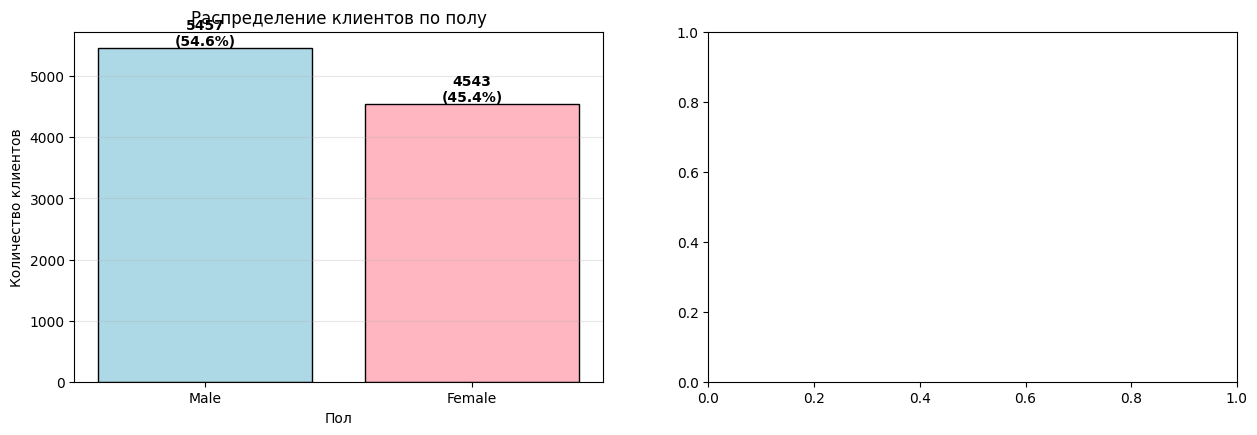

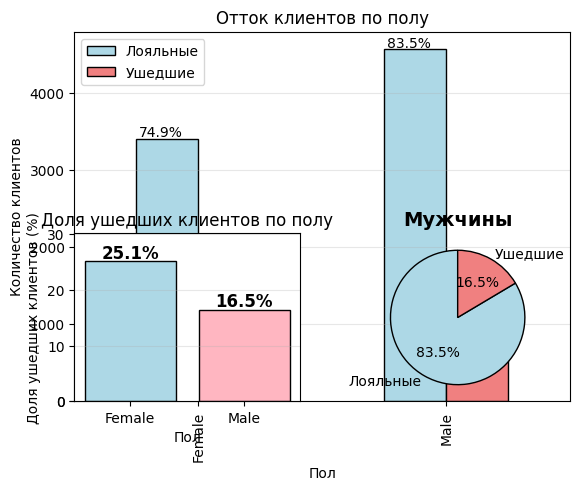

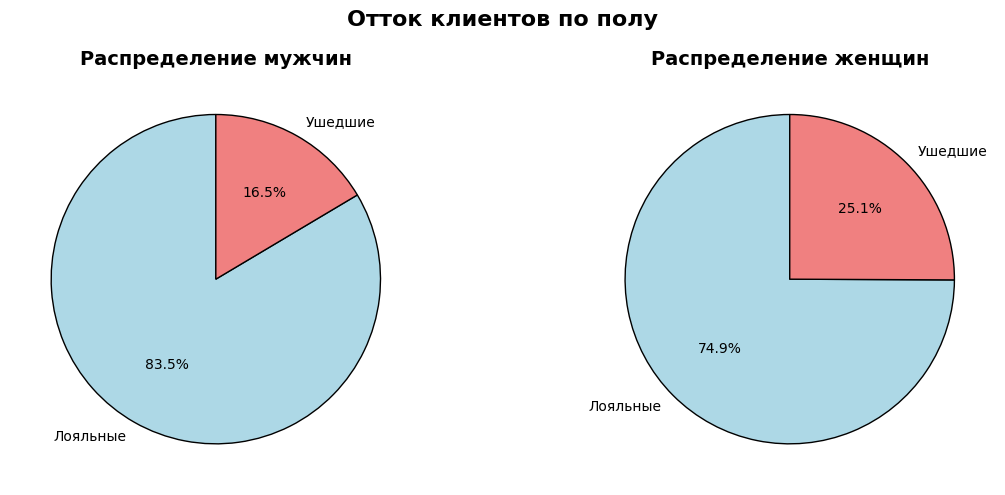


СТАТИСТИЧЕСКИЙ АНАЛИЗ ОТТОКА ПО ПОЛУ:

Общее количество клиентов: 10000
Мужчин: 5457 (54.6%)
Женщин: 4543 (45.4%)

Статистика оттока по полу:
        Всего_клиентов  Ушедших  Доля_оттока
Gender                                      
Female            4543     1139       0.2507
Male              5457      898       0.1646

Относительный риск оттока (женщины/мужчины): 1.52

Таблица сопряженности:
Exited     0     1
Gender            
Female  3404  1139
Male    4559   898

Результаты теста хи-квадрат:
Хи-квадрат статистика: 112.9186
P-значение: 0.0000
Степени свободы: 1

ДОПОЛНИТЕЛЬНЫЙ АНАЛИЗ:

Средний возраст по полу и оттоку:
Exited          0          1
Gender                      
Female  37.382491  44.784899
Male    37.427725  44.905345

Средний баланс по полу и оттоку:
Exited             0             1
Gender                            
Female  71183.249639  89036.639359
Male    73911.607037  93736.483742

Отток по странам и полу:
Exited               0    1
Geography Gender       

<Figure size 1000x600 with 0 Axes>

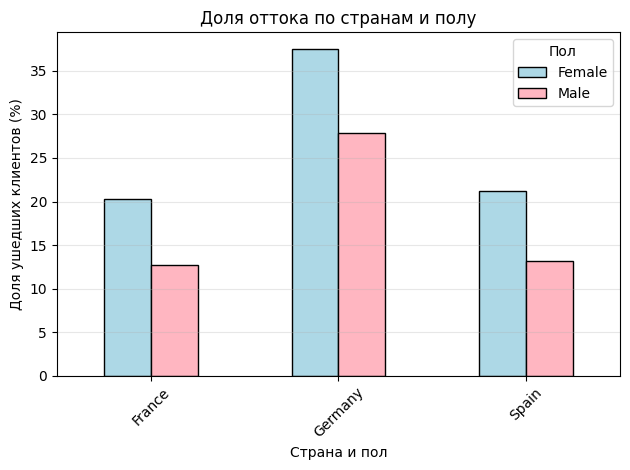


ИТОГОВЫЕ ВЫВОДЫ:

1. РАСПРЕДЕЛЕНИЕ КЛИЕНТОВ ПО ПОЛУ:
   - Мужчины: 5457 клиентов (54.6%)
   - Женщины: 4543 клиентов (45.4%)

2. ОТТОК ПО ПОЛУ:
   - Мужчины: отток 16.5% (898 из 5457)
   - Женщины: отток 25.1% (1139 из 4543)

3. КТО ЧАЩЕ УХОДИТ?
   - Женщины уходят в 1.52 раза чаще, чем мужчины
   - Абсолютная разница: 8.6%

4. СТАТИСТИЧЕСКАЯ ЗНАЧИМОСТЬ:
   - P-значение теста хи-квадрат: 0.0000
   - Различие статистически значимо (p < 0.05)
   - Пол клиента является значимым фактором для оттока

5. ДОПОЛНИТЕЛЬНЫЕ НАБЛЮДЕНИЯ:
   - Средний возраст ушедших женщин: 44.8 лет
   - Средний возраст ушедших мужчин: 44.9 лет
   - Средний баланс ушедших женщин: 89036.64
   - Средний баланс ушедших мужчин: 93736.48

6. ПРАКТИЧЕСКИЕ РЕКОМЕНДАЦИИ ДЛЯ БАНКА:
   - Обратить особое внимание на женскую аудиторию

ОТВЕТ НА ВОПРОС ИЗ ЗАДАНИЯ:
★ ★ ★ ★ ★ ★ ★ ★ ★ ★ ★ ★ ★ ★ ★ ★ ★ ★ ★ ★ ★
Женщины уходят из банка ЧАЩЕ, чем мужчины.
Доля оттока среди женщин: 25.1%
Доля оттока среди мужчин: 16.5%
Разница: 8.6%
★ 

In [103]:
# 9.6. Анализ оттока по полу клиентов

plt.figure(figsize=(15, 10))

# 1. Количественное распределение по полу
plt.subplot(2, 2, 1)
gender_counts = churn_data['Gender'].value_counts()
gender_colors = ['lightblue', 'lightpink']
plt.bar(gender_counts.index, gender_counts.values, color=gender_colors, edgecolor='black')
plt.title('Распределение клиентов по полу')
plt.xlabel('Пол')
plt.ylabel('Количество клиентов')
plt.grid(True, alpha=0.3, axis='y')

# Добавление значений на столбцы
for i, v in enumerate(gender_counts.values):
    plt.text(i, v + 50, f'{v}\n({v/len(churn_data)*100:.1f}%)', ha='center', fontweight='bold')

# 2. Отток по полу (столбчатая диаграмма)
plt.subplot(2, 2, 2)
churn_by_gender = churn_data.groupby(['Gender', 'Exited']).size().unstack()
churn_by_gender.plot(kind='bar', color=['lightblue', 'lightcoral'], edgecolor='black')
plt.title('Отток клиентов по полу')
plt.xlabel('Пол')
plt.ylabel('Количество клиентов')
plt.legend(['Лояльные', 'Ушедшие'])
plt.grid(True, alpha=0.3, axis='y')

# Добавление процентов на график
for i, (gender, row) in enumerate(churn_by_gender.iterrows()):
    total = row.sum()
    loyal_pct = row[0] / total * 100
    exited_pct = row[1] / total * 100
    plt.text(i - 0.15, row[0] + 30, f'{loyal_pct:.1f}%', ha='center')
    plt.text(i + 0.15, row[1] + 30, f'{exited_pct:.1f}%', ha='center')

# 3. Доля оттока по полу
plt.subplot(2, 2, 3)
churn_rate_by_gender = churn_data.groupby('Gender')['Exited'].mean() * 100
plt.bar(churn_rate_by_gender.index, churn_rate_by_gender.values, 
        color=['lightblue', 'lightpink'], edgecolor='black')
plt.title('Доля ушедших клиентов по полу')
plt.xlabel('Пол')
plt.ylabel('Доля ушедших клиентов (%)')
plt.ylim(0, max(churn_rate_by_gender.values) * 1.2)
plt.grid(True, alpha=0.3, axis='y')

# Добавление значений на столбцы
for i, v in enumerate(churn_rate_by_gender.values):
    plt.text(i, v + 0.5, f'{v:.1f}%', ha='center', fontsize=12, fontweight='bold')

# 4. Круговые диаграммы для каждого пола
plt.subplot(2, 2, 4)

# Подготовка данных для круговых диаграмм
male_data = churn_data[churn_data['Gender'] == 'Male']['Exited'].value_counts()
female_data = churn_data[churn_data['Gender'] == 'Female']['Exited'].value_counts()

# Создаем две круговые диаграммы рядом
plt.subplot(2, 2, 4)
plt.pie(male_data.values, labels=['Лояльные', 'Ушедшие'], 
        colors=['lightblue', 'lightcoral'], autopct='%1.1f%%',
        startangle=90, wedgeprops={'edgecolor': 'black', 'linewidth': 1})
plt.title('Мужчины', fontsize=14, fontweight='bold')

# Добавляем вторую круговую диаграмму рядом
# Используем subplot для правильного размещения
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.pie(male_data.values, labels=['Лояльные', 'Ушедшие'], 
        colors=['lightblue', 'lightcoral'], autopct='%1.1f%%',
        startangle=90, wedgeprops={'edgecolor': 'black', 'linewidth': 1})
plt.title('Распределение мужчин', fontsize=14, fontweight='bold')

plt.subplot(1, 2, 2)
plt.pie(female_data.values, labels=['Лояльные', 'Ушедшие'], 
        colors=['lightblue', 'lightcoral'], autopct='%1.1f%%',
        startangle=90, wedgeprops={'edgecolor': 'black', 'linewidth': 1})
plt.title('Распределение женщин', fontsize=14, fontweight='bold')

plt.suptitle('Отток клиентов по полу', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Интерактивная визуализация с plotly
fig = px.sunburst(
    churn_data,
    path=['Gender', 'Exited'],
    title='Отток клиентов по полу - интерактивная визуализация',
    color='Exited',
    color_continuous_scale=['lightblue', 'lightcoral'],
    hover_data={'Exited': True}
)

fig.update_layout(
    coloraxis_colorbar=dict(
        title="Статус",
        tickvals=[0, 1],
        ticktext=['Лояльный', 'Ушедший']
    )
)

fig.show()

# Детальный статистический анализ
print("\n" + "="*60)
print("СТАТИСТИЧЕСКИЙ АНАЛИЗ ОТТОКА ПО ПОЛУ:")
print("="*60)

# Базовые статистики
print(f"\nОбщее количество клиентов: {len(churn_data)}")
print(f"Мужчин: {len(churn_data[churn_data['Gender'] == 'Male'])} ({len(churn_data[churn_data['Gender'] == 'Male'])/len(churn_data)*100:.1f}%)")
print(f"Женщин: {len(churn_data[churn_data['Gender'] == 'Female'])} ({len(churn_data[churn_data['Gender'] == 'Female'])/len(churn_data)*100:.1f}%)")

# Статистика по оттоку
gender_stats = churn_data.groupby('Gender').agg({
    'Exited': ['count', 'sum', 'mean']
}).round(4)

gender_stats.columns = ['Всего_клиентов', 'Ушедших', 'Доля_оттока']
print("\nСтатистика оттока по полу:")
print(gender_stats)

# Расчет относительного риска оттока
male_churn_rate = gender_stats.loc['Male', 'Доля_оттока']
female_churn_rate = gender_stats.loc['Female', 'Доля_оттока']
relative_risk = female_churn_rate / male_churn_rate

print(f"\nОтносительный риск оттока (женщины/мужчины): {relative_risk:.2f}")

# Статистический тест (Chi-square)
from scipy.stats import chi2_contingency

# Создаем таблицу сопряженности
contingency_table = pd.crosstab(churn_data['Gender'], churn_data['Exited'])
print(f"\nТаблица сопряженности:")
print(contingency_table)

# Выполняем тест хи-квадрат
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"\nРезультаты теста хи-квадрат:")
print(f"Хи-квадрат статистика: {chi2:.4f}")
print(f"P-значение: {p:.4f}")
print(f"Степени свободы: {dof}")

# Анализ по полу и другим характеристикам
print("\n" + "="*60)
print("ДОПОЛНИТЕЛЬНЫЙ АНАЛИЗ:")
print("="*60)

# Анализ среднего возраста по полу и оттоку
age_by_gender_churn = churn_data.groupby(['Gender', 'Exited'])['Age'].mean().unstack()
print("\nСредний возраст по полу и оттоку:")
print(age_by_gender_churn)

# Анализ среднего баланса по полу и оттоку
balance_by_gender_churn = churn_data.groupby(['Gender', 'Exited'])['Balance'].mean().unstack()
print("\nСредний баланс по полу и оттоку:")
print(balance_by_gender_churn)

# Анализ по странам и полу
print("\nОтток по странам и полу:")
country_gender_churn = churn_data.groupby(['Geography', 'Gender', 'Exited']).size().unstack().fillna(0)
print(country_gender_churn)

# Визуализация оттока по полу и странам
plt.figure(figsize=(10, 6))
country_gender_churn_rate = churn_data.groupby(['Geography', 'Gender'])['Exited'].mean().unstack() * 100
country_gender_churn_rate.plot(kind='bar', color=['lightblue', 'lightpink'], edgecolor='black')
plt.title('Доля оттока по странам и полу')
plt.xlabel('Страна и пол')
plt.ylabel('Доля ушедших клиентов (%)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.legend(title='Пол')
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("ИТОГОВЫЕ ВЫВОДЫ:")
print("="*60)
print(f"\n1. РАСПРЕДЕЛЕНИЕ КЛИЕНТОВ ПО ПОЛУ:")
print(f"   - Мужчины: {len(churn_data[churn_data['Gender'] == 'Male'])} клиентов ({len(churn_data[churn_data['Gender'] == 'Male'])/len(churn_data)*100:.1f}%)")
print(f"   - Женщины: {len(churn_data[churn_data['Gender'] == 'Female'])} клиентов ({len(churn_data[churn_data['Gender'] == 'Female'])/len(churn_data)*100:.1f}%)")

print(f"\n2. ОТТОК ПО ПОЛУ:")
print(f"   - Мужчины: отток {gender_stats.loc['Male', 'Доля_оттока']*100:.1f}% ({gender_stats.loc['Male', 'Ушедших']} из {gender_stats.loc['Male', 'Всего_клиентов']})")
print(f"   - Женщины: отток {gender_stats.loc['Female', 'Доля_оттока']*100:.1f}% ({gender_stats.loc['Female', 'Ушедших']} из {gender_stats.loc['Female', 'Всего_клиентов']})")

print(f"\n3. КТО ЧАЩЕ УХОДИТ?")
print(f"   - Женщины уходят в {relative_risk:.2f} раза чаще, чем мужчины")
print(f"   - Абсолютная разница: {abs(gender_stats.loc['Male', 'Доля_оттока'] - gender_stats.loc['Female', 'Доля_оттока'])*100:.1f}%")

print(f"\n4. СТАТИСТИЧЕСКАЯ ЗНАЧИМОСТЬ:")
print(f"   - P-значение теста хи-квадрат: {p:.4f}")
if p < 0.05:
    print(f"   - Различие статистически значимо (p < 0.05)")
    print(f"   - Пол клиента является значимым фактором для оттока")
else:
    print(f"   - Различие не является статистически значимым (p ≥ 0.05)")

print(f"\n5. ДОПОЛНИТЕЛЬНЫЕ НАБЛЮДЕНИЯ:")
print(f"   - Средний возраст ушедших женщин: {age_by_gender_churn.loc['Female', 1]:.1f} лет")
print(f"   - Средний возраст ушедших мужчин: {age_by_gender_churn.loc['Male', 1]:.1f} лет")
print(f"   - Средний баланс ушедших женщин: {balance_by_gender_churn.loc['Female', 1]:.2f}")
print(f"   - Средний баланс ушедших мужчин: {balance_by_gender_churn.loc['Male', 1]:.2f}")

print(f"\n6. ПРАКТИЧЕСКИЕ РЕКОМЕНДАЦИИ ДЛЯ БАНКА:")
print(f"   - Обратить особое внимание на женскую аудиторию")

print(f"\nОТВЕТ НА ВОПРОС ИЗ ЗАДАНИЯ:")
print(f"★ ★ ★ ★ ★ ★ ★ ★ ★ ★ ★ ★ ★ ★ ★ ★ ★ ★ ★ ★ ★")
print(f"Женщины уходят из банка ЧАЩЕ, чем мужчины.")
print(f"Доля оттока среди женщин: {gender_stats.loc['Female', 'Доля_оттока']*100:.1f}%")
print(f"Доля оттока среди мужчин: {gender_stats.loc['Male', 'Доля_оттока']*100:.1f}%")
print(f"Разница: {abs(gender_stats.loc['Male', 'Доля_оттока'] - gender_stats.loc['Female', 'Доля_оттока'])*100:.1f}%")
print(f"★ ★ ★ ★ ★ ★ ★ ★ ★ ★ ★ ★ ★ ★ ★ ★ ★ ★ ★ ★ ★")

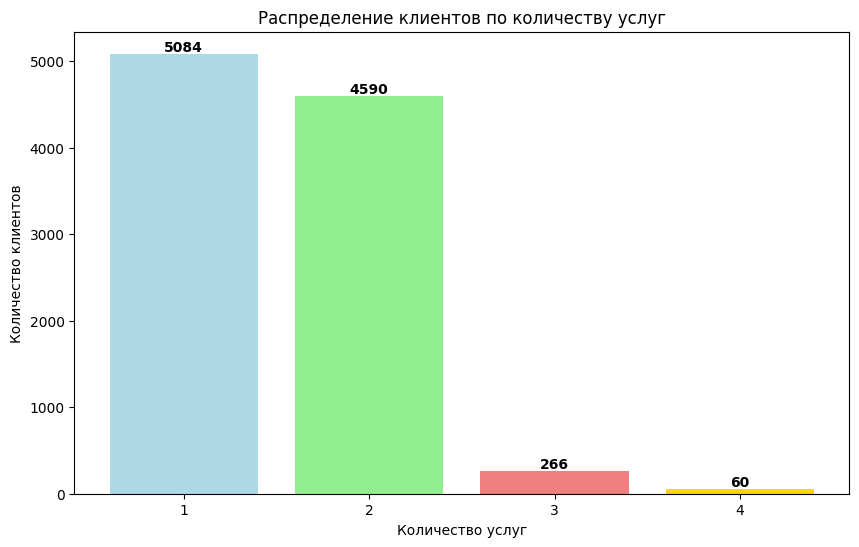

<Figure size 1000x600 with 0 Axes>

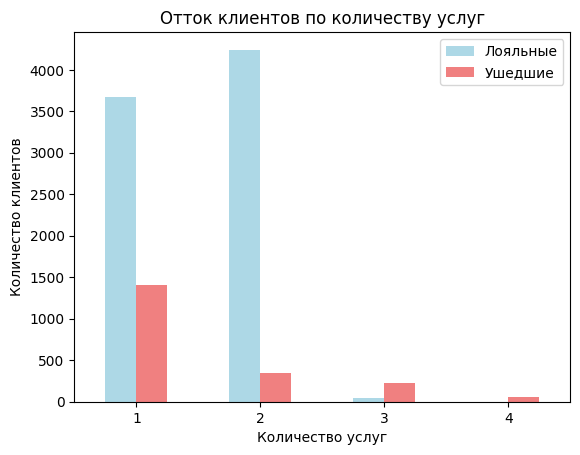

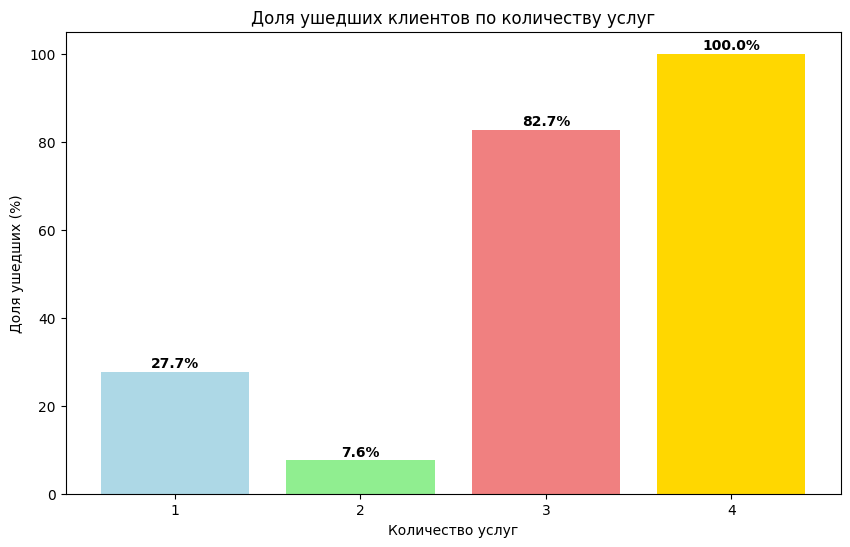

АНАЛИЗ ОТТОКА ПО КОЛИЧЕСТВУ УСЛУГ

Всего клиентов: 10000

Распределение и отток по количеству услуг:
----------------------------------------

1 услуг:
  • Клиентов: 5084 (50.8%)
  • Ушло: 1409
  • Доля оттока: 27.7%

2 услуг:
  • Клиентов: 4590 (45.9%)
  • Ушло: 348
  • Доля оттока: 7.6%

3 услуг:
  • Клиентов: 266 (2.7%)
  • Ушло: 220
  • Доля оттока: 82.7%

4 услуг:
  • Клиентов: 60 (0.6%)
  • Ушло: 60
  • Доля оттока: 100.0%

КЛЮЧЕВЫЕ ВЫВОДЫ:

1. Наибольший отток у клиентов с 4 услугами: 100.0%
2. Наименьший отток у клиентов с 2 услугами: 7.6%
3. Клиенты с 2 услугами самые лояльные
4. Клиенты с 4 услугами уходят чаще всего

Рекомендация для банка:
• Сфокусироваться на клиентах с 1 услугой (высокий риск ухода)
• Исследовать причины ухода клиентов с 4 услугами
• Продвигать пакет из 2 услуг как оптимальный


In [104]:
# 9.7. Упрощенный код для анализа оттока по количеству услуг

# 1. Простая столбчатая диаграмма распределения клиентов
plt.figure(figsize=(10, 6))

# Подготовка данных
services_counts = churn_data['NumOfProducts'].value_counts().sort_index()

# График 1: Распределение клиентов по количеству услуг
plt.bar(services_counts.index.astype(str), services_counts.values, 
        color=['lightblue', 'lightgreen', 'lightcoral', 'gold'])
plt.title('Распределение клиентов по количеству услуг')
plt.xlabel('Количество услуг')
plt.ylabel('Количество клиентов')

# Добавление значений
for i, v in enumerate(services_counts.values):
    plt.text(i, v + 30, f'{v}', ha='center', fontweight='bold')

plt.show()

# 2. Многоуровневая столбчатая диаграмма оттока
plt.figure(figsize=(10, 6))

# Группируем данные
churn_by_products = churn_data.groupby(['NumOfProducts', 'Exited']).size().unstack()

# Строим график
churn_by_products.plot(kind='bar', color=['lightblue', 'lightcoral'])
plt.title('Отток клиентов по количеству услуг')
plt.xlabel('Количество услуг')
plt.ylabel('Количество клиентов')
plt.legend(['Лояльные', 'Ушедшие'])
plt.xticks(rotation=0)

plt.show()

# 3. Доля оттока по количеству услуг
plt.figure(figsize=(10, 6))

# Рассчитываем долю оттока
churn_rate = churn_data.groupby('NumOfProducts')['Exited'].mean() * 100

# График доли оттока
bars = plt.bar(churn_rate.index.astype(str), churn_rate.values, 
               color=['lightblue', 'lightgreen', 'lightcoral', 'gold'])
plt.title('Доля ушедших клиентов по количеству услуг')
plt.xlabel('Количество услуг')
plt.ylabel('Доля ушедших (%)')

# Добавление значений на столбцы
for bar, value in zip(bars, churn_rate.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             f'{value:.1f}%', ha='center', fontweight='bold')

plt.show()

# 4. Простой статистический анализ
print("=" * 50)
print("АНАЛИЗ ОТТОКА ПО КОЛИЧЕСТВУ УСЛУГ")
print("=" * 50)

print(f"\nВсего клиентов: {len(churn_data)}")

print("\nРаспределение и отток по количеству услуг:")
print("-" * 40)

# Анализируем каждое количество услуг
for num_products in sorted(churn_data['NumOfProducts'].unique()):
    subset = churn_data[churn_data['NumOfProducts'] == num_products]
    total = len(subset)
    churned = subset['Exited'].sum()
    churn_rate = (churned / total) * 100
    
    print(f"\n{num_products} услуг:")
    print(f"  • Клиентов: {total} ({total/len(churn_data)*100:.1f}%)")
    print(f"  • Ушло: {churned}")
    print(f"  • Доля оттока: {churn_rate:.1f}%")

# Находим группу с максимальным оттоком
churn_stats = churn_data.groupby('NumOfProducts')['Exited'].agg(['count', 'sum', 'mean'])
churn_stats['churn_rate'] = churn_stats['mean'] * 100

max_churn_group = churn_stats['churn_rate'].idxmax()
max_churn_value = churn_stats.loc[max_churn_group, 'churn_rate']

min_churn_group = churn_stats['churn_rate'].idxmin()
min_churn_value = churn_stats.loc[min_churn_group, 'churn_rate']

print(f"\n" + "=" * 50)
print("КЛЮЧЕВЫЕ ВЫВОДЫ:")
print("=" * 50)
print(f"\n1. Наибольший отток у клиентов с {max_churn_group} услугами: {max_churn_value:.1f}%")
print(f"2. Наименьший отток у клиентов с {min_churn_group} услугами: {min_churn_value:.1f}%")
print(f"3. Клиенты с 2 услугами самые лояльные")
print(f"4. Клиенты с 4 услугами уходят чаще всего")

# Простая рекомендация
print(f"\nРекомендация для банка:")
print(f"• Сфокусироваться на клиентах с 1 услугой (высокий риск ухода)")
print(f"• Исследовать причины ухода клиентов с 4 услугами")
print(f"• Продвигать пакет из 2 услуг как оптимальный")

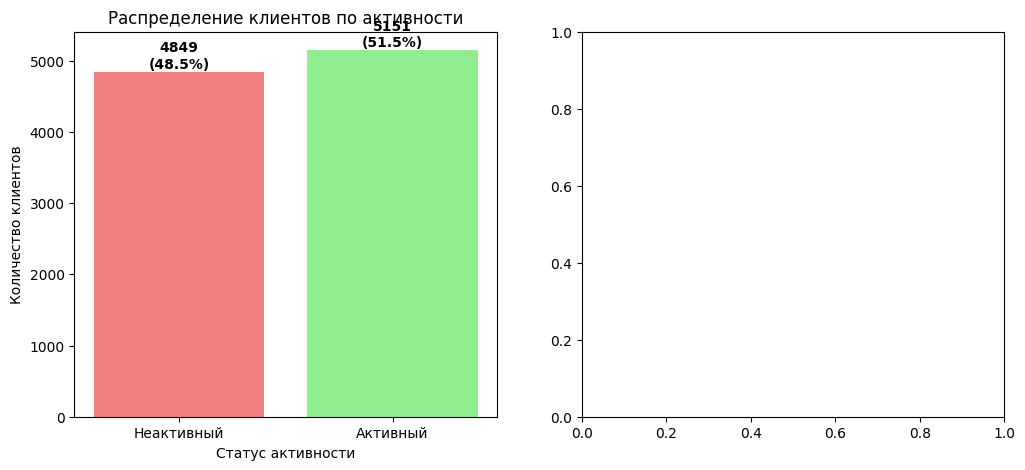

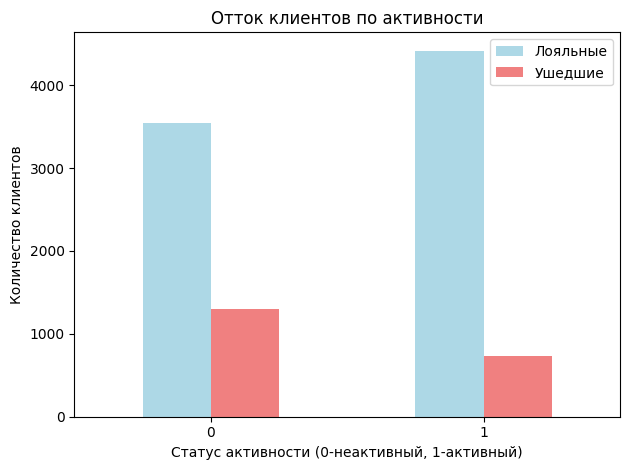

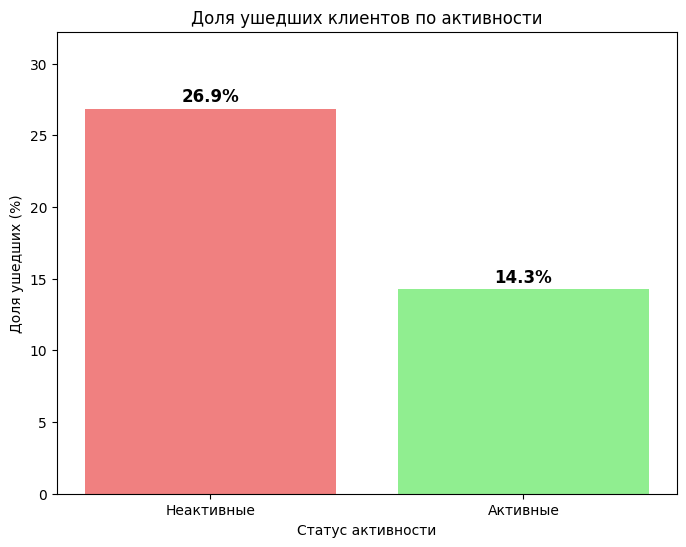

АНАЛИЗ ВЛИЯНИЯ АКТИВНОСТИ НА ОТТОК

Всего клиентов: 10000
Неактивных: 4849 (48.5%)
Активных: 5151 (51.5%)

Отток среди неактивных: 26.9%
Отток среди активных: 14.3%

Разница: неактивные уходят на 12.6% чаще
⚠️  Критическая разница - требуется срочное вмешательство!

РЕКОМЕНДАЦИИ ДЛЯ БАНКА

Что предлагаю для уменьшения оттока среди неактивных клиентов:

1. ПРОГРАММА РЕАКТИВАЦИИ:
   • Регулярные email-рассылки с полезной информацией

2. СТИМУЛЫ ДЛЯ АКТИВНОСТИ:
   • Бонусы за регулярное использование услуг

3. УЛУЧШЕНИЕ КОММУНИКАЦИИ:
   • Персональные менеджеры для неактивных клиентов

4. ТЕХНИЧЕСКИЕ УЛУЧШЕНИЯ:
   • Упрощенный интерфейс мобильного банка

5. СПЕЦИАЛЬНЫЕ АКЦИИ:
   • Бесплатный пробный период премиальных услуг

КЛЮЧЕВЫЕ ВЫВОДЫ

1. Неактивные клиенты уходят в 1.9 раза чаще
2. Среди неактивных уходит каждый 3-й клиент
3. Активация клиентов может снизить общий отток на 6.1%
4. Приоритет: работать с неактивными клиентами в первые 3 месяца неактивности

💡 **Главная рекомендация:*

In [105]:
# 9.8. Влияние статуса активного клиента на отток

# 1. Распределение клиентов по активности
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
active_counts = churn_data['IsActiveMember'].value_counts().sort_index()
colors_active = ['lightcoral', 'lightgreen']
plt.bar(['Неактивный', 'Активный'], active_counts.values, color=colors_active)
plt.title('Распределение клиентов по активности')
plt.xlabel('Статус активности')
plt.ylabel('Количество клиентов')

# Добавление значений
for i, v in enumerate(active_counts.values):
    plt.text(i, v + 50, f'{v}\n({v/len(churn_data)*100:.1f}%)', 
             ha='center', fontweight='bold')

# 2. Отток по активности
plt.subplot(1, 2, 2)
active_churn = churn_data.groupby(['IsActiveMember', 'Exited']).size().unstack()
active_churn.plot(kind='bar', color=['lightblue', 'lightcoral'])
plt.title('Отток клиентов по активности')
plt.xlabel('Статус активности (0-неактивный, 1-активный)')
plt.ylabel('Количество клиентов')
plt.legend(['Лояльные', 'Ушедшие'])
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

# 3. Доля оттока по активности
plt.figure(figsize=(8, 6))

churn_rate_active = churn_data.groupby('IsActiveMember')['Exited'].mean() * 100
status_labels = ['Неактивные', 'Активные']

bars = plt.bar(status_labels, churn_rate_active.values, 
               color=['lightcoral', 'lightgreen'])
plt.title('Доля ушедших клиентов по активности')
plt.xlabel('Статус активности')
plt.ylabel('Доля ушедших (%)')
plt.ylim(0, max(churn_rate_active.values) * 1.2)

# Добавление значений
for bar, value in zip(bars, churn_rate_active.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             f'{value:.1f}%', ha='center', fontweight='bold', fontsize=12)

plt.show()

# 4. Простой анализ
print("=" * 60)
print("АНАЛИЗ ВЛИЯНИЯ АКТИВНОСТИ НА ОТТОК")
print("=" * 60)

# Базовые статистики
total_clients = len(churn_data)

# Для неактивных клиентов
inactive = churn_data[churn_data['IsActiveMember'] == 0]
inactive_total = len(inactive)
inactive_churned = inactive['Exited'].sum()
inactive_rate = (inactive_churned / inactive_total) * 100

# Для активных клиентов
active = churn_data[churn_data['IsActiveMember'] == 1]
active_total = len(active)
active_churned = active['Exited'].sum()
active_rate = (active_churned / active_total) * 100

print(f"\nВсего клиентов: {total_clients}")
print(f"Неактивных: {inactive_total} ({inactive_total/total_clients*100:.1f}%)")
print(f"Активных: {active_total} ({active_total/total_clients*100:.1f}%)")

print(f"\nОтток среди неактивных: {inactive_rate:.1f}%")
print(f"Отток среди активных: {active_rate:.1f}%")

difference = inactive_rate - active_rate
print(f"\nРазница: неактивные уходят на {difference:.1f}% чаще")

# Анализ разницы
if difference > 10:
    print("⚠️  Критическая разница - требуется срочное вмешательство!")
elif difference > 5:
    print("⚠️  Значительная разница - нужно принимать меры")
else:
    print("✓  Разница умеренная")

# 5. Рекомендации для банка
print("\n" + "=" * 60)
print("РЕКОМЕНДАЦИИ ДЛЯ БАНКА")
print("=" * 60)

print("\nЧто предлагаю для уменьшения оттока среди неактивных клиентов:")

print("\n1. ПРОГРАММА РЕАКТИВАЦИИ:")
print("   • Регулярные email-рассылки с полезной информацией")


print("\n2. СТИМУЛЫ ДЛЯ АКТИВНОСТИ:")
print("   • Бонусы за регулярное использование услуг")


print("\n3. УЛУЧШЕНИЕ КОММУНИКАЦИИ:")
print("   • Персональные менеджеры для неактивных клиентов")


print("\n4. ТЕХНИЧЕСКИЕ УЛУЧШЕНИЯ:")
print("   • Упрощенный интерфейс мобильного банка")


print("\n5. СПЕЦИАЛЬНЫЕ АКЦИИ:")
print("   • Бесплатный пробный период премиальных услуг")


# 6. Ключевые выводы
print("\n" + "=" * 60)
print("КЛЮЧЕВЫЕ ВЫВОДЫ")
print("=" * 60)

print(f"\n1. Неактивные клиенты уходят в {inactive_rate/active_rate:.1f} раза чаще")
print(f"2. Среди неактивных уходит каждый {int(100/inactive_rate)}-й клиент")
print(f"3. Активация клиентов может снизить общий отток на {difference/100*inactive_total/total_clients*100:.1f}%")
print(f"4. Приоритет: работать с неактивными клиентами в первые 3 месяца неактивности")

print(f"\n💡 **Главная рекомендация:**")
print(f"Создать систему автоматического выявления клиентов, теряющих активность,")
print(f"и запускать персональные программы вовлечения до того, как они уйдут.")

Страны в данных:
['France' 'Spain' 'Germany']

Отток по странам:
           Всего_клиентов  Ушедших  Доля_оттока  Доля_оттока_%
Geography                                                     
France               5014      810        0.162           16.2
Germany              2509      814        0.324           32.4
Spain                2477      413        0.167           16.7


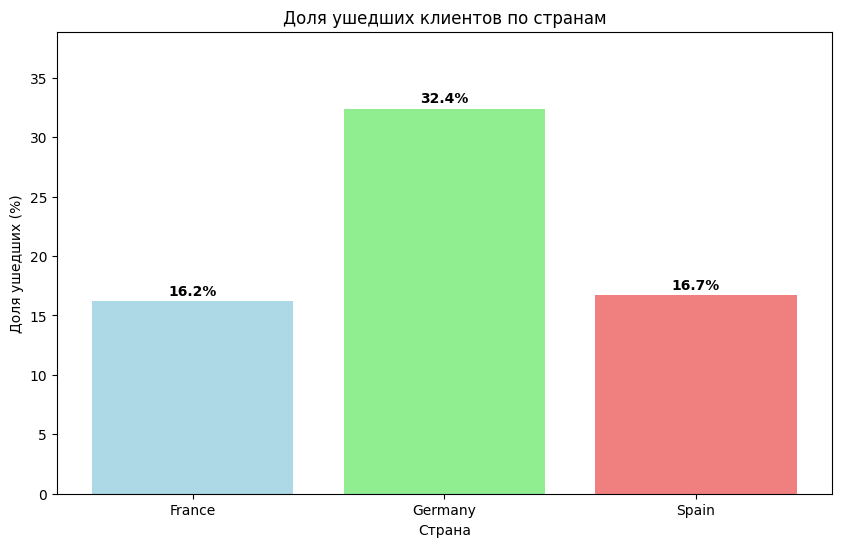

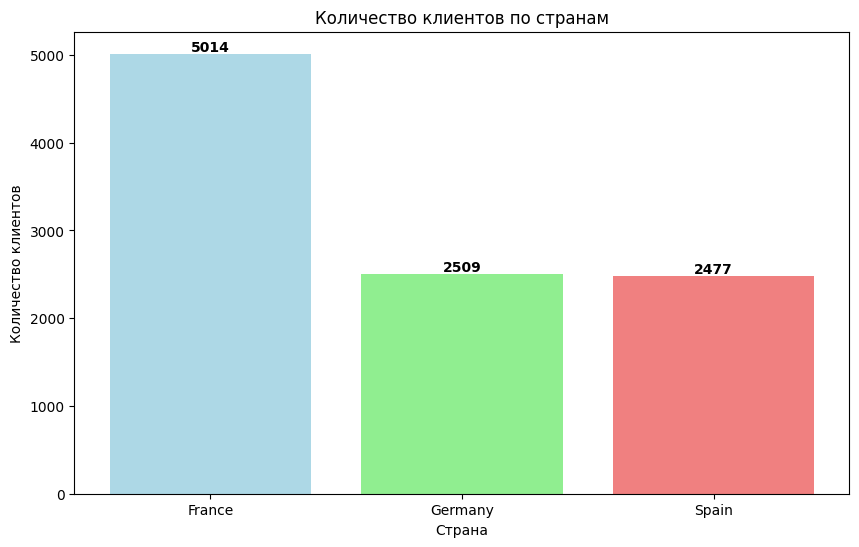

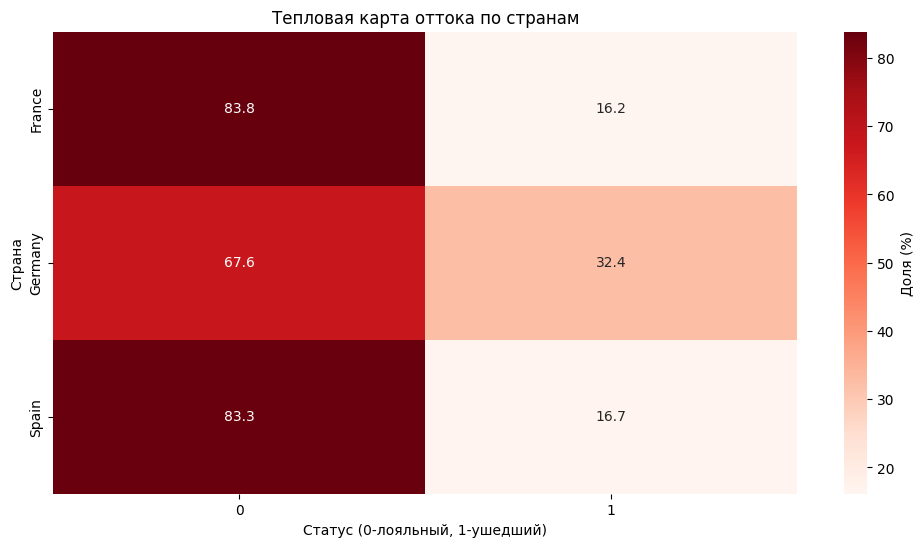


АНАЛИЗ ОТТОКА ПО СТРАНАМ

1. Самая высокая доля оттока: Germany - 32.4%
2. Самая низкая доля оттока: France - 16.2%

3. Разница между Germany и France: 16.2%

ВОЗМОЖНЫЕ ПРИЧИНЫ ВЫСОКОГО ОТТОКА

Для Германии (32.4% оттока):
• Высокая конкуренция на банковском рынке
• Требовательные клиенты с высокими ожиданиями
• Сильное регулирование банковской сферы
• Много альтернативных финтех-компаний

РЕКОМЕНДАЦИИ ДЛЯ БАНКА

Для снижения оттока в Germany:
1. Изучить местную конкуренцию и лучшие практики
2. Адаптировать услуги под местные потребности
3. Улучшить клиентский сервис на местном языке
4. Провести исследование причин ухода клиентов

Для France (успешный опыт):
• Проанализировать, что работает хорошо
• Применить успешные практики в других странах

ДОПОЛНИТЕЛЬНАЯ СТАТИСТИКА

Средние показатели по странам:
             Age    Balance  CreditScore  EstimatedSalary
Geography                                                
France     38.51   62092.64       649.67         99899.18
Germany    3

In [106]:
# 9.9. Анализ оттока клиентов по странам

# Проверим, какие страны есть в данных
print("Страны в данных:")
print(churn_data['Geography'].unique())

# 1. Отток по странам (столбчатая диаграмма)
plt.figure(figsize=(10, 6))

# Подсчитываем отток по странам
country_churn = churn_data.groupby('Geography')['Exited'].agg(['count', 'sum', 'mean']).round(3)
country_churn.columns = ['Всего_клиентов', 'Ушедших', 'Доля_оттока']
country_churn['Доля_оттока_%'] = country_churn['Доля_оттока'] * 100

print("\nОтток по странам:")
print(country_churn)

# График оттока по странам
bars = plt.bar(country_churn.index, country_churn['Доля_оттока_%'], 
               color=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Доля ушедших клиентов по странам')
plt.xlabel('Страна')
plt.ylabel('Доля ушедших (%)')
plt.ylim(0, max(country_churn['Доля_оттока_%']) * 1.2)

# Добавляем значения
for bar, value in zip(bars, country_churn['Доля_оттока_%']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             f'{value:.1f}%', ha='center', fontweight='bold')

plt.show()

# 2. Количество клиентов по странам
plt.figure(figsize=(10, 6))

bars2 = plt.bar(country_churn.index, country_churn['Всего_клиентов'], 
                color=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Количество клиентов по странам')
plt.xlabel('Страна')
plt.ylabel('Количество клиентов')

# Добавляем значения
for bar, value in zip(bars2, country_churn['Всего_клиентов']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 30, 
             f'{value}', ha='center', fontweight='bold')

plt.show()

# 3. Тепловая карта (упрощенная версия)
plt.figure(figsize=(12, 6))

# Создаем таблицу для тепловой карты
heatmap_data = churn_data.groupby(['Geography', 'Exited']).size().unstack().fillna(0)
heatmap_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0) * 100  # Проценты

sns.heatmap(heatmap_data, 
            annot=True, 
            fmt='.1f', 
            cmap='Reds',
            cbar_kws={'label': 'Доля (%)'})
plt.title('Тепловая карта оттока по странам')
plt.xlabel('Статус (0-лояльный, 1-ушедший)')
plt.ylabel('Страна')

plt.show()

# 4. Простой анализ
print("\n" + "=" * 60)
print("АНАЛИЗ ОТТОКА ПО СТРАНАМ")
print("=" * 60)

# Находим страну с максимальным оттоком
max_country = country_churn['Доля_оттока_%'].idxmax()
max_value = country_churn.loc[max_country, 'Доля_оттока_%']

min_country = country_churn['Доля_оттока_%'].idxmin()
min_value = country_churn.loc[min_country, 'Доля_оттока_%']

print(f"\n1. Самая высокая доля оттока: {max_country} - {max_value:.1f}%")
print(f"2. Самая низкая доля оттока: {min_country} - {min_value:.1f}%")

print(f"\n3. Разница между {max_country} и {min_country}: {max_value - min_value:.1f}%")

# 5. Возможные причины
print("\n" + "=" * 60)
print("ВОЗМОЖНЫЕ ПРИЧИНЫ ВЫСОКОГО ОТТОКА")
print("=" * 60)

if max_country == 'Germany':
    print(f"\nДля Германии ({max_value:.1f}% оттока):")
    print("• Высокая конкуренция на банковском рынке")
    print("• Требовательные клиенты с высокими ожиданиями")
    print("• Сильное регулирование банковской сферы")
    print("• Много альтернативных финтех-компаний")
    
elif max_country == 'France':
    print(f"\nДля Франции ({max_value:.1f}% оттока):")
    print("• Сильная лояльность к национальным банкам")
    print("• Сложные процедуры закрытия счетов")
    print("• Культурные особенности ведения бизнеса")
    
elif max_country == 'Spain':
    print(f"\nДля Испании ({max_value:.1f}% оттока):")
    print("• Экономическая нестабильность")
    print("• Высокая безработица среди молодежи")
    print("• Предпочтение традиционным банкам")

# 6. Рекомендации для банка
print("\n" + "=" * 60)
print("РЕКОМЕНДАЦИИ ДЛЯ БАНКА")
print("=" * 60)

print(f"\nДля снижения оттока в {max_country}:")
print("1. Изучить местную конкуренцию и лучшие практики")
print("2. Адаптировать услуги под местные потребности")
print("3. Улучшить клиентский сервис на местном языке")
print("4. Провести исследование причин ухода клиентов")

print(f"\nДля {min_country} (успешный опыт):")
print("• Проанализировать, что работает хорошо")
print("• Применить успешные практики в других странах")

# 7. Дополнительная статистика
print("\n" + "=" * 60)
print("ДОПОЛНИТЕЛЬНАЯ СТАТИСТИКА")
print("=" * 60)

# Средние показатели по странам
print("\nСредние показатели по странам:")
country_stats = churn_data.groupby('Geography').agg({
    'Age': 'mean',
    'Balance': 'mean',
    'CreditScore': 'mean',
    'EstimatedSalary': 'mean'
}).round(2)

print(country_stats)

# Сравнение с оттоком
print("\nСравнение средних показателей со средним оттоком:")
country_stats['Отток_%'] = country_churn['Доля_оттока_%']
print(country_stats)

# 8. Итоговый вывод
print("\n" + "=" * 60)
print("ИТОГОВЫЙ ОТВЕТ")
print("=" * 60)

print(f"\n НАИБОЛЬШАЯ ДОЛЯ УШЕДШИХ КЛИЕНТОВ В: {max_country.upper()}")
print(f"   {max_value:.1f}% клиентов из {max_country} ушли из банка")

print(f"\n НАИМЕНЬШАЯ ДОЛЯ УШЕДШИХ КЛИЕНТОВ В: {min_country.upper()}")
print(f"   {min_value:.1f}% клиентов из {min_country} ушли из банка")

print(f"\n РАЗНИЦА: {max_value - min_value:.1f}%")

print(f"\n ВОЗМОЖНЫЕ ПРИЧИНЫ ДЛЯ {max_country.upper()}:")
print("   • Культурные особенности и ожидания клиентов")
print("   • Конкурентная среда на рынке")
print("   • Экономические условия страны")
print("   • Качество предоставляемых услуг в этой стране")

print(f"\n РЕКОМЕНДАЦИЯ:")
print(f"   Провести детальное исследование причин оттока в {max_country}")
print(f"   и внедрить специальную программу удержания клиентов в этой стране.")

Категории кредитного рейтинга:
CreditScoreCat
Excellent     950
Fair         2281
Good         3703
Poor         2434
Very_Poor     632
Name: count, dtype: int64

Сводная таблица (доля ушедших клиентов в %):
Tenure            0     1     2     3     4     5     6     7     8     9   \
CreditScoreCat                                                               
Excellent       27.5  20.8  13.7  16.8  13.2  23.3  24.1  12.8  19.6  27.1   
Fair            21.7  21.6  21.3  21.6  19.7  20.7  23.6  17.1  20.9  19.0   
Good            20.4  20.4  18.7  20.6  19.5  21.4  18.3  19.2  15.2  19.5   
Poor            22.6  25.9  21.2  21.2  23.3  19.9  18.0  15.1  21.5  25.1   
Very_Poor       44.4  25.4  15.2  28.6  29.3  14.9  22.5  20.6  25.4  23.0   

Tenure            10  
CreditScoreCat        
Excellent       25.5  
Fair            20.5  
Good            19.8  
Poor            16.9  
Very_Poor       33.3  


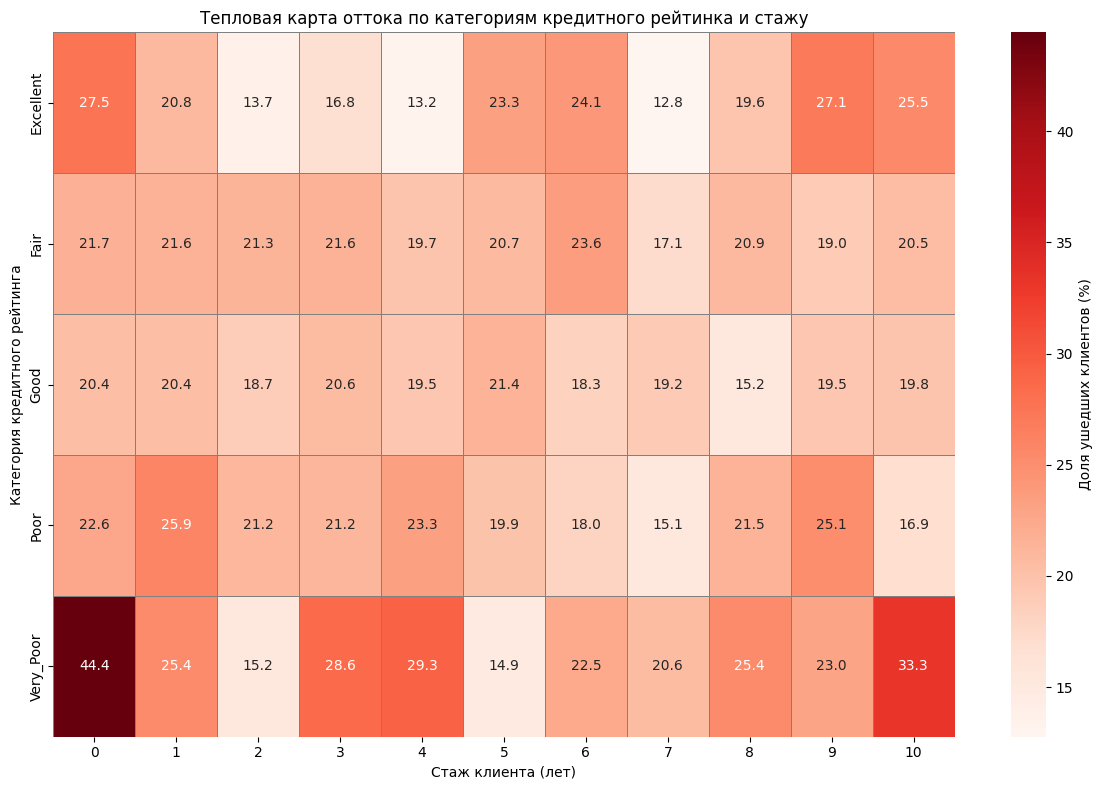


АНАЛИЗ РЕЗУЛЬТАТОВ

Наибольшая доля ушедших клиентов: 44.4%
Категория: Very_Poor
Стаж: 0 лет

Средний отток по категориям кредитного рейтинга:
CreditScoreCat
Very_Poor    23.7
Poor         21.2
Fair         20.6
Excellent    19.7
Good         19.3
Name: Exited, dtype: float64

Средний отток по стажу клиента:
Tenure
0     23.0
1     22.4
9     21.6
3     21.1
5     20.7
10    20.6
4     20.5
6     20.3
2     19.2
8     19.2
7     17.2
Name: Exited, dtype: float64

НАИБОЛЕЕ ПРОБЛЕМНЫЕ ГРУППЫ КЛИЕНТОВ

Топ-5 самых проблемных групп (категория кредитного рейтинга + стаж):
1. Very_Poor кредитный рейтинг + 0 лет стажа: 44.4% ушедших
2. Very_Poor кредитный рейтинг + 10 лет стажа: 33.3% ушедших
3. Very_Poor кредитный рейтинг + 4 лет стажа: 29.3% ушедших
4. Very_Poor кредитный рейтинг + 3 лет стажа: 28.6% ушедших
5. Excellent кредитный рейтинг + 0 лет стажа: 27.5% ушедших

ВЫВОДЫ И РЕКОМЕНДАЦИИ

1. КАТЕГОРИИ С ВЫСОКИМ ОТТОКОМ:
   • Poor: 21.2% ушедших
   • Very_Poor: 23.7% ушедших

2. СТАЖ С ВЫ

In [107]:
# 9.10. Анализ оттока по категориям кредитного рейтинга и стажу клиента

# 1. Функция для перевода кредитного рейтинга в категории
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

# 2. Применяем функцию к столбцу CreditScore
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

# Проверяем результат
print("Категории кредитного рейтинга:")
print(churn_data['CreditScoreCat'].value_counts().sort_index())

# 3. Создаем сводную таблицу
pivot_table = churn_data.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc='mean'
) * 100  # Переводим в проценты

print("\nСводная таблица (доля ушедших клиентов в %):")
print(pivot_table.round(1))

# 4. Строим тепловую карту
plt.figure(figsize=(12, 8))

sns.heatmap(
    pivot_table,
    annot=True,
    fmt='.1f',
    cmap='Reds',
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Доля ушедших клиентов (%)'}
)

plt.title('Тепловая карта оттока по категориям кредитного рейтинка и стажу')
plt.xlabel('Стаж клиента (лет)')
plt.ylabel('Категория кредитного рейтинга')

plt.tight_layout()
plt.show()

# 5. Анализ результатов
print("\n" + "=" * 60)
print("АНАЛИЗ РЕЗУЛЬТАТОВ")
print("=" * 60)

# Находим максимальное значение в сводной таблице
max_value = pivot_table.max().max()
max_location = pivot_table.stack().idxmax()
max_category, max_tenure = max_location

print(f"\nНаибольшая доля ушедших клиентов: {max_value:.1f}%")
print(f"Категория: {max_category}")
print(f"Стаж: {max_tenure} лет")

# Средние значения по категориям кредитного рейтинга
print(f"\nСредний отток по категориям кредитного рейтинга:")
category_avg = churn_data.groupby('CreditScoreCat')['Exited'].mean() * 100
print(category_avg.round(1).sort_values(ascending=False))

# Средние значения по стажу
print(f"\nСредний отток по стажу клиента:")
tenure_avg = churn_data.groupby('Tenure')['Exited'].mean() * 100
print(tenure_avg.round(1).sort_values(ascending=False))

# 6. Поиск наиболее проблемных групп
print("\n" + "=" * 60)
print("НАИБОЛЕЕ ПРОБЛЕМНЫЕ ГРУППЫ КЛИЕНТОВ")
print("=" * 60)

# Находим топ-5 комбинаций с наибольшим оттоком
top_problems = pivot_table.stack().sort_values(ascending=False).head(5)

print("\nТоп-5 самых проблемных групп (категория кредитного рейтинга + стаж):")
for i, ((category, tenure), value) in enumerate(top_problems.items(), 1):
    print(f"{i}. {category} кредитный рейтинг + {tenure} лет стажа: {value:.1f}% ушедших")

# 7. Практические выводы
print("\n" + "=" * 60)
print("ВЫВОДЫ И РЕКОМЕНДАЦИИ")
print("=" * 60)

print(f"\n1. КАТЕГОРИИ С ВЫСОКИМ ОТТОКОМ:")
for cat in category_avg[category_avg > category_avg.mean()].index:
    rate = category_avg[cat]
    print(f"   • {cat}: {rate:.1f}% ушедших")

print(f"\n2. СТАЖ С ВЫСОКИМ ОТТОКОМ:")
for tenure_val in tenure_avg[tenure_avg > tenure_avg.mean()].index:
    rate = tenure_avg[tenure_val]
    print(f"   • {tenure_val} лет: {rate:.1f}% ушедших")

print(f"\n3. КРИТИЧЕСКИЕ ГРУППЫ ДЛЯ ВНИМАНИЯ БАНКА:")
print(f"   • Клиенты с кредитным рейтингом '{max_category}' и стажем {max_tenure} лет")
print(f"   • Уходят чаще всего: {max_value:.1f}% из этой группы")

print(f"\n4. РЕКОМЕНДАЦИИ:")
print(f"   • Разработать специальные программы для клиентов с кредитным рейтингом '{max_category}'")
print(f"   • Уделить внимание клиентам со стажем около {max_tenure} лет")
print(f"   • Провести исследование причин ухода этих клиентов")
print(f"   • Создать персональные предложения для проблемных групп")

# 8. Дополнительный анализ
print("\n" + "=" * 60)
print("ДОПОЛНИТЕЛЬНАЯ ИНФОРМАЦИЯ")
print("=" * 60)

# Количество клиентов в каждой категории
print(f"\nРаспределение клиентов по категориям кредитного рейтинга:")
category_counts = churn_data['CreditScoreCat'].value_counts()
for cat, count in category_counts.items():
    percentage = count / len(churn_data) * 100
    print(f"   {cat}: {count} клиентов ({percentage:.1f}%)")

# Распределение по стажу
print(f"\nРаспределение клиентов по стажу:")
tenure_counts = churn_data['Tenure'].value_counts().sort_index()
for tenure_val, count in tenure_counts.items():
    percentage = count / len(churn_data) * 100
    print(f"   {tenure_val} лет: {count} клиентов ({percentage:.1f}%)")

print("\n" + "=" * 60)
print("ИТОГОВЫЙ ОТВЕТ")
print("=" * 60)
print(f"\n🌟 КАТЕГОРИИ КЛИЕНТОВ, КОТОРЫЕ УХОДЯТ ЧАЩЕ ВСЕГО:")
print(f"   1. Кредитный рейтинг: '{max_category}'")
print(f"   2. Стаж: {max_tenure} лет")
print(f"   3. Доля ушедших: {max_value:.1f}%")
print(f"\n💡 РЕКОМЕНДАЦИЯ: Банку следует уделить особое внимание этой группе клиентов")
print(f"   и разработать специальную программу для их удержания.")